<h1 style="color:#DB8201;"> Análise Descritiva ENEM 2023 🎓📊

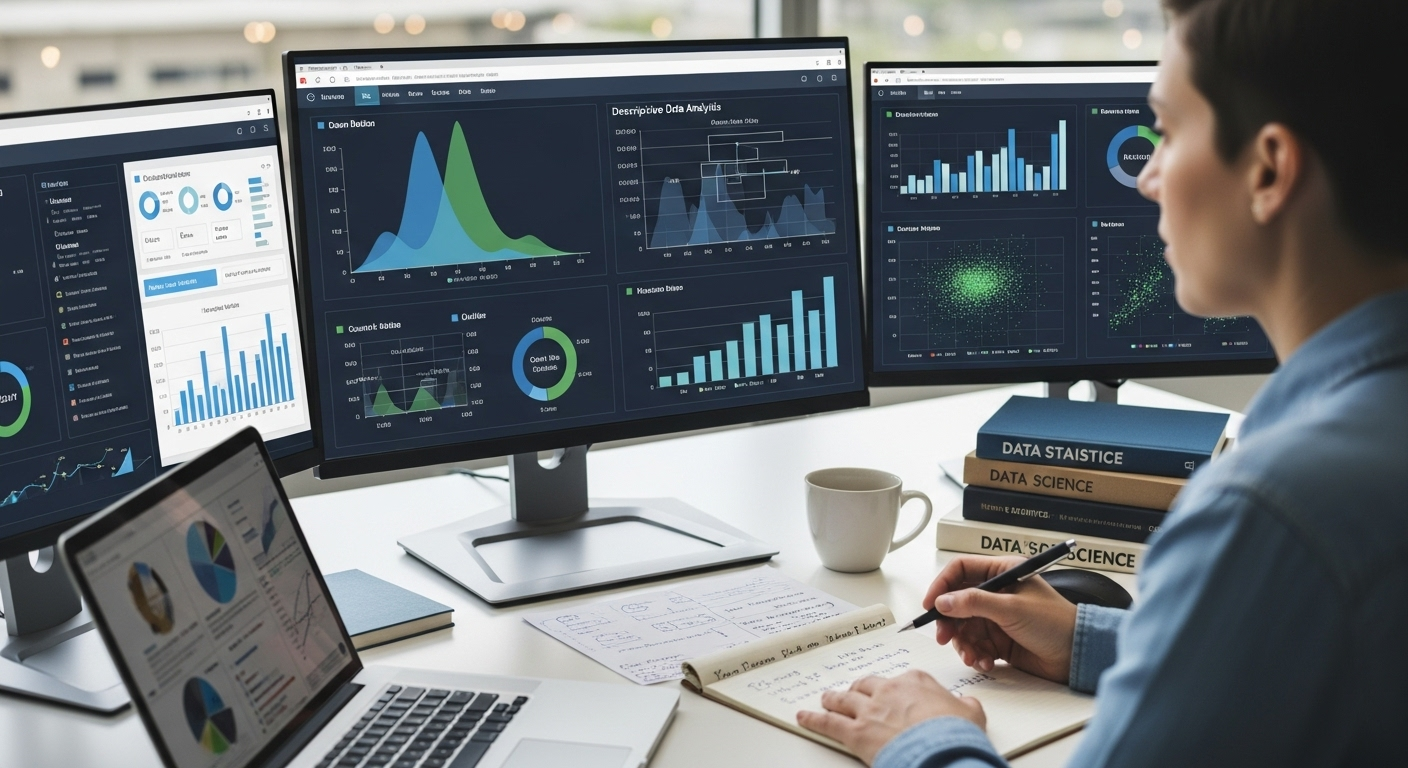

In [2]:
from IPython.display import Image
Image(filename='Image_fx.jpg')

Este notebook tem como objetivo realizar uma análise descritiva dos dados do Exame Nacional do Ensino Médio (ENEM), explorando suas principais variáveis e características. Através de técnicas estatísticas e visualizações, buscaremos compreender o perfil dos participantes, a distribuição das notas, padrões regionais e outros aspectos relevantes que possam emergir dos dados.

A análise será conduzida utilizando Python e bibliotecas como Pandas, Matplotlib e Seaborn, permitindo uma abordagem clara e interativa. Este estudo é fundamental para identificar tendências, desigualdades e oportunidades de melhoria no sistema educacional brasileiro. 

Os dados utilizados nesta análise já passaram por etapas de limpeza e tratamento, conforme documentado no arquivo "01 preparação de dados". Por esse motivo, esta etapa do estudo será focada exclusivamente na exploração e interpretação das variáveis, sem a necessidade de aplicar técnicas adicionais de pré-processamento ou enriquecimento dos dados.


<a style="color:#DB8201;"> 🔍 Sumário 

1. [<span style="color:#DB8201;">Importação das bibliotecas e carregamento dos dados</span>](#Importação-das-bibliotecas-e-carregamento-dos-dados)
2. [<span style="color:#DB8201;">Lidando com outliers</span>](#Lidando-com-outliers)
3. [<span style="color:#DB8201;">Análise Exploratória (EDA)</span>](#analise-exploratoria-eda)
4. [<span style="color:#DB8201;">Conclusão</span>](#conclusao)

## <span id="Importação-das-bibliotecas-e-carregamento-dos-dados" style="color:#DB8201;">1. Importação das bibliotecas e carregamento dos dados</span>

O primeiro passo consiste na importação das bibliotecas que serão utilizadas ao longo de toda a análise. Em seguida, serão definidas funções responsáveis por padronizar os parâmetros visuais da maioria dos gráficos, garantindo consistência e organização nas visualizações.

In [1]:
#Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format','{:.2f}'.format)


import warnings
warnings.filterwarnings('ignore')

In [3]:
#Importando os dados
caminho = ("dados_limpos.csv")
df = pd.read_csv(caminho, sep=',', encoding='latin1')

In [5]:
df

,NU_INSCRICAO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,n_faltas
0,210061103945,6,F,1,1,1,1,0,1,1.00,0,0.00,0,0.00,0,2.00,1.00,0.00,4305108,Caxias do Sul,43,RS,1,1,1,1,502.00,498.90,475.60,363.20,1,1.00,140.00,200.00,100.00,120.00,140.00,700.00,H,E,C,F,5,C,A,B,D,B,A,B,A,B,A,B,A,A,B,A,A,A,A,A,B,4
1,210060214087,2,F,1,3,1,2,0,2,1.00,0,2304400.00,Fortaleza,23.00,CE,2.00,1.00,1.00,2304400,Fortaleza,23,CE,1,1,1,1,459.00,508.50,507.20,466.70,0,1.00,140.00,200.00,160.00,180.00,200.00,880.00,D,D,B,B,5,C,A,B,B,A,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B,4
2,210059980948,3,F,1,3,1,2,0,2,1.00,0,2311306.00,QuixadÃ¡,23.00,CE,2.00,1.00,1.00,2311306,QuixadÃ¡,23,CE,1,1,1,1,402.50,379.20,446.90,338.30,0,1.00,120.00,120.00,120.00,120.00,80.00,560.00,B,B,A,A,4,B,A,B,A,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,A,4
3,210060801601,11,M,1,1,1,1,8,1,1.00,0,0.00,0,0.00,0,2.00,1.00,0.00,3505906,Batatais,35,SP,1,1,1,1,564.70,630.30,610.40,680.20,0,1.00,120.00,120.00,120.00,120.00,120.00,600.00,H,E,F,D,2,F,A,B,C,B,B,B,B,B,A,B,A,B,C,B,A,C,A,B,B,4
4,210059085130,8,M,1,3,1,1,5,1,1.00,0,0.00,0,0.00,0,2.00,1.00,0.00,2408102,Natal,24,RN,1,1,1,1,644.90,620.20,626.90,736.30,0,1.00,140.00,200.00,160.00,160.00,200.00,860.00,F,C,D,B,4,B,A,C,C,A,A,B,A,B,A,B,A,B,B,A,A,E,A,B,B,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2840727,210061965964,12,F,1,1,1,1,17,1,1.00,0,0.00,0,0.00,0,2.00,1.00,0.00,4314902,Porto Alegre,43,RS,1,1,1,1,568.60,605.20,598.20,496.80,0,1.00,120.00,120.00,100.00,100.00,60.00,500.00,B,B,D,D,3,D,A,B,D,B,A,C,A,B,A,B,A,B,C,A,A,D,A,B,B,4
2840728,210061959674,3,M,1,1,1,2,0,2,1.00,0,4318705.00,SÃ£o Leopoldo,43.00,RS,2.00,1.00,1.00,4318705,SÃ£o Leopoldo,43,RS,1,1,1,1,476.20,542.90,545.20,530.50,0,1.00,120.00,160.00,80.00,120.00,120.00,600.00,E,E,D,D,4,F,A,C,D,C,A,B,C,B,B,B,A,B,D,B,A,E,A,C,B,4
2840729,210061959676,12,M,1,1,1,1,6,1,1.00,0,0.00,0,0.00,0,2.00,1.00,0.00,4303103,Cachoeirinha,43,RS,1,1,1,1,566.20,605.60,613.70,547.30,0,1.00,120.00,120.00,120.00,100.00,80.00,540.00,C,E,F,F,5,F,A,B,D,B,B,B,A,B,B,B,A,A,C,A,B,E,A,A,B,4
2840730,210061950911,1,F,1,1,2,3,0,1,1.00,1,0.00,0,0.00,0,2.00,1.00,0.00,3550308,SÃ£o Paulo,35,SP,1,1,1,1,377.20,535.60,610.60,644.40,0,1.00,140.00,120.00,120.00,140.00,120.00,640.00,F,F,B,B,4,F,B,E,D,C,A,B,B,B,A,B,A,B,C,B,B,B,B,C,B,4


In [7]:
# Acessa a paleta 'tab20' como lista de cores
cores = [
    '#DB8201',
    '#FEAD34',
    '#FEC671',
    '#D08C27',
    '#DEA754',
    '#DEA754',
    '#FFB300',
    '#FFCE5C',
    '#CC8F00',
    '#FC9D4A',
    '#FC8822']
def conta (x):
    # Contagem
    contagem = df[x].value_counts()

    # Plot
    plt.figure(figsize=(14,7))
    fig, ax = plt.subplots()
    contagem.plot(kind='bar', ax=ax, color = cores )
    plt.xticks(rotation=90)

    # Adicionar rótulos com os valores inteiros (sem notação científica)
    for i, valor in enumerate(contagem):
        ax.text(i, valor + 0.1, f'{valor:,}', ha='center', va='bottom', fontsize=10)

    # Configurar para não usar notação científica no eixo Y
    ax.ticklabel_format(style='plain', axis='y')

    # Título e rótulos
    ax.set_title(x)
    ax.set_xlabel('Categoria')
    ax.set_ylabel('Frequência')

    plt.tight_layout()
    plt.show()

def pizza(x):
    
    fig, ax = plt.subplots()
    df[x].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, ax=ax, colors = cores )
    plt.title(x)
    centro = plt.Circle((0, 0), 0.70, color='white')
    fig.gca().add_artist(centro)

def cont_h(x):
    counts = df[x].value_counts()
    plt.figure(figsize=(14,7))

    # Cria o gráfico horizontal
    counts.plot.barh(color=cores)

    ax = counts.plot.barh(color=cores)
    plt.xlabel('Número de Participantes')
    plt.title(x)

    for i, (valor, nome) in enumerate(zip(counts.values, counts.index)):
        plt.text(valor + 0.1, i, str(valor), va='center')

    plt.tight_layout()
    plt.show()

## <span id="Lidando-com-outliers" style="color:#DB8201;">2. Lidando com outliers</span>

Como primeiro passo desta análise, será feita uma investigação sobre a presença de outliers nos dados. Por se tratar de uma prova nacional com grande diversidade de participantes, é esperado que alguns candidatos tenham obtido desempenhos excepcionalmente altos — o que pode gerar valores extremos nas distribuições de notas.

Embora esses outliers sejam legítimos e representem casos reais, eles podem inflar medidas estatísticas como a média e distorcer a percepção geral do desempenho dos participantes. Isso é especialmente relevante em avaliações educacionais, onde o objetivo é compreender padrões amplos e não apenas casos excepcionais.

Portanto, antes de qualquer interpretação mais profunda, é essencial entender o comportamento desses dados extremos, avaliar sua frequência e impacto, e decidir se será necessário aplicar algum tipo de tratamento — como exclusão, substituição ou análise separada — para garantir que as conclusões sejam representativas da maioria dos participantes.


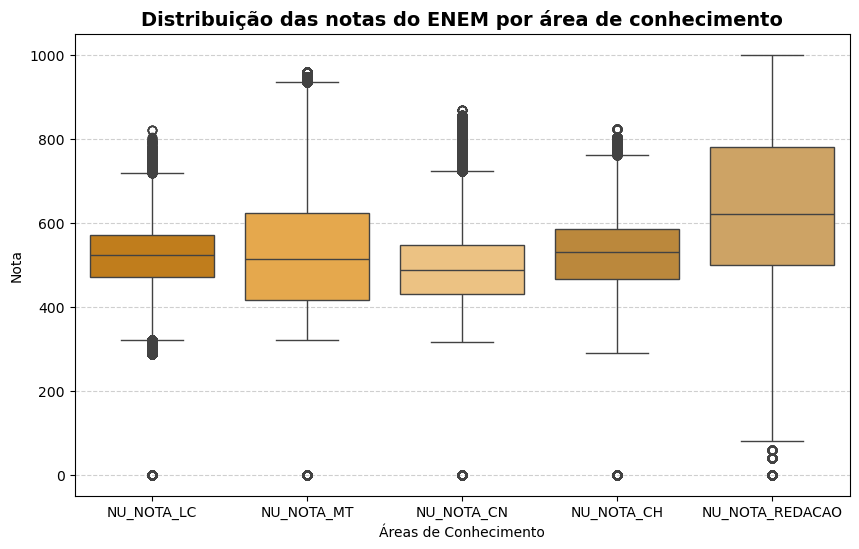

In [171]:
# Lista com as colunas das notas
colunas_notas = ['NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_REDACAO']

# Criar o boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[colunas_notas],  palette=sns.color_palette(cores))

# Personalização
plt.title("Distribuição das notas do ENEM por área de conhecimento", fontsize=14, fontweight='bold')
plt.xlabel("Áreas de Conhecimento")
plt.ylabel("Nota")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

A análise do gráfico revela que vários participantes alcançaram notas significativamente acima da média. No entanto, também é possível identificar a presença de outliers com notas muito baixas no tema **"Linguagem e Códigos"**, além de um padrão curioso em **Redação**, onde não há registros de notas acima da média — apenas abaixo. Diante desse cenário, vamos aprofundar a investigação desses casos para identificar possíveis padrões que possam explicar o bom desempenho. Como se tratam de competências distintas, cada uma será analisada separadamente para garantir uma compreensão mais precisa.

Segue agora um discionário dos dados usados nos gráficos.<br>
Definição da faixa etária:<br> 
1 -	Menor de 17 anos<br>
2 -	17 anos<br>
3 -	18 anos<br>
4 -	19 anos<br>
5 -	20 anos<br>
6 -	21 anos<br>
7 -	22 anos<br>
8 -	23 anos<br>
9 -	24 anos<br>
10 -	25 anos<br>
11 - Entre 26 e 30 anos<br>
12 -	Entre 31 e 35 anos<br>
13 -	Entre 36 e 40 anos<br>
14 -	Entre 41 e 45 anos<br>
15 -	Entre 46 e 50 anos<br>
16 -	Entre 51 e 55 anos<br>
17 -	Entre 56 e 60 anos<br>
18 -	Entre 61 e 65 anos<br>
19 -	Entre 66 e 70 anos<br>
20 -	Maior de 70 anos<br>

Definição do tipo de escola: <br>
1 -	Não Respondeu<br>
2 -	Pública<br>
3 -	Privada<br>

Definição do renda familiar **(Q006)**: <br>
A-	Nenhuma Renda <br>
B-	Até 1.320,00<br>
C-	De 1.320,01 até 1.980,00.<br>
D-	De 1.980,01 até 2.640,00.<br>
E-	De 2.640,01 até 3.300,00.<br>
F-	De 3.300,01 até 3.960,00.<br>
G-	De 3.960,01 até 5.280,00.<br>
H-	De 5.280,01 até 6.600,00.<br>
I-	De 6.600,01 até 7.920,00.<br>
J-	De 7.920,01 até 9240,00.<br>
K-	De 9.240,01 até 10.560,00.<br>
L-	De 10.560,01 até 11.880,00.<br>
M-	De 11.880,01 até 13.200,00.<br>
N-	De 13.200,01 até 15.840,00.<br>
O-	De 15.840,01 até 19.800,00.<br>
P-	De 19.800,01 até 26.400,00.<br>
Q-	Acima de 26.400,00.<br>


### <span style="color:#DB8201;">1.1 Notas Acima da Média</span>

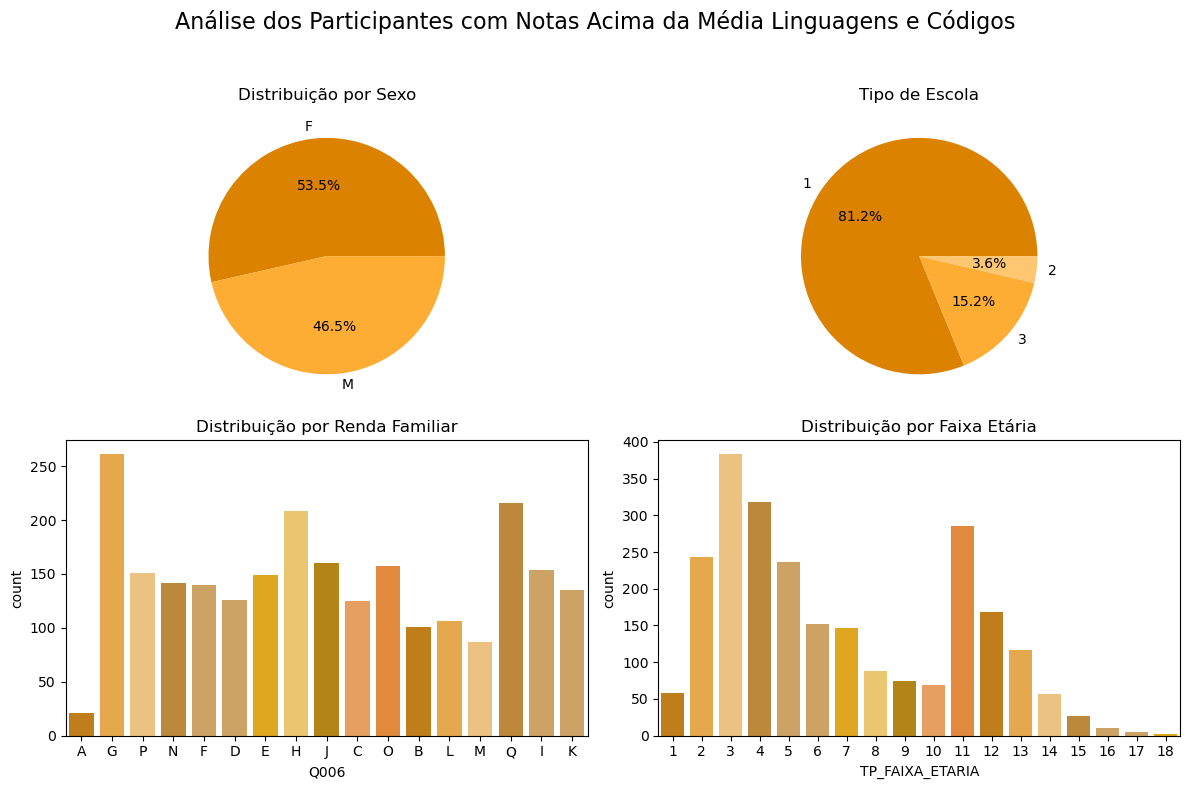

In [174]:
#Isolando notas acima do limite
Q1 = df['NU_NOTA_LC'].quantile(0.25)
Q3 = df['NU_NOTA_LC'].quantile(0.75)
IQR = Q3 - Q1

#selecionando participantes acima da média 
limite_superior = Q3 + 1.5 * IQR
altas_notas = df[df['NU_NOTA_LC'] > limite_superior]

#Criação de visualizações 

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Gráfico de pizza para sexo
sexo_counts = altas_notas['TP_SEXO'].value_counts()
axs[0, 0].pie(sexo_counts, labels=sexo_counts.index, colors=cores, autopct='%1.1f%%')
axs[0, 0].set_title('Distribuição por Sexo')

# Gráfico de pizza para tipo de escola
escola_counts = altas_notas['TP_ESCOLA'].value_counts()
axs[0, 1].pie(escola_counts, labels=escola_counts.index, colors=cores, autopct='%1.1f%%')
axs[0, 1].set_title('Tipo de Escola')

# Gráfico de barras para condição financeira
sns.countplot(data=altas_notas, x='Q006',palette=cores, ax=axs[1, 0])
axs[1, 0].set_title('Distribuição por Renda Familiar')

# Gráfico de barras para idade
sns.countplot(data=altas_notas, x='TP_FAIXA_ETARIA',palette=cores, ax=axs[1, 1])
axs[1, 1].set_title('Distribuição por Faixa Etária')

# Título geral
fig.suptitle('Análise dos Participantes com Notas Acima da Média Linguagens e Códigos', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ajusta layout para não sobrepor o título
plt.show()

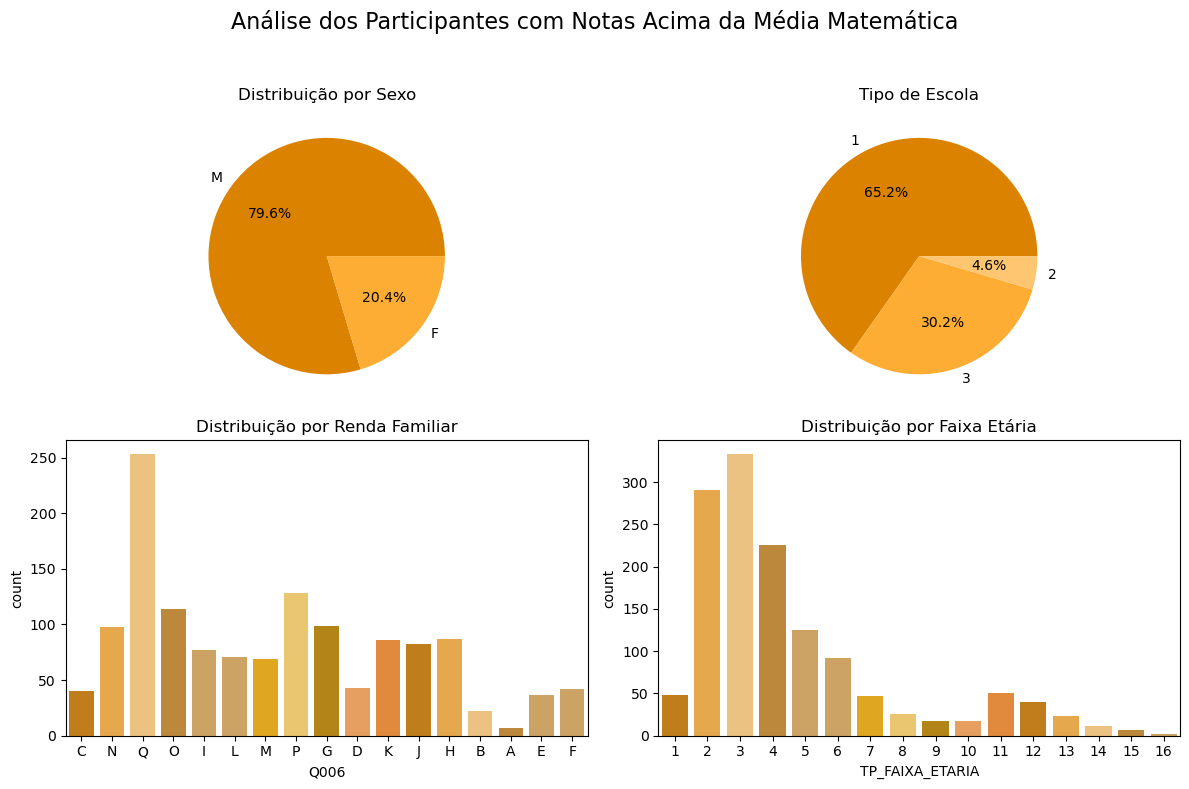

In [176]:
#Isolando notas acima do limite
Q1 = df['NU_NOTA_MT'].quantile(0.25)
Q3 = df['NU_NOTA_MT'].quantile(0.75)
IQR = Q3 - Q1

#selecionando participantes acima da média 
limite_superior = Q3 + 1.5 * IQR
altas_notas = df[df['NU_NOTA_MT'] > limite_superior]

#Criação de visualizações 

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Gráfico de pizza para sexo
sexo_counts = altas_notas['TP_SEXO'].value_counts()
axs[0, 0].pie(sexo_counts, labels=sexo_counts.index, colors=cores, autopct='%1.1f%%')
axs[0, 0].set_title('Distribuição por Sexo')

# Gráfico de pizza para tipo de escola
escola_counts = altas_notas['TP_ESCOLA'].value_counts()
axs[0, 1].pie(escola_counts, labels=escola_counts.index, colors=cores, autopct='%1.1f%%')
axs[0, 1].set_title('Tipo de Escola')

# Gráfico de barras para condição financeira
sns.countplot(data=altas_notas, x='Q006', palette=cores, ax=axs[1, 0])
axs[1, 0].set_title('Distribuição por Renda Familiar')

# Gráfico de barras para idade
sns.countplot(data=altas_notas, x='TP_FAIXA_ETARIA', palette=cores, ax=axs[1, 1])
axs[1, 1].set_title('Distribuição por Faixa Etária')

# Título geral
fig.suptitle('Análise dos Participantes com Notas Acima da Média Matemática', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ajusta layout para não sobrepor o título
plt.show()

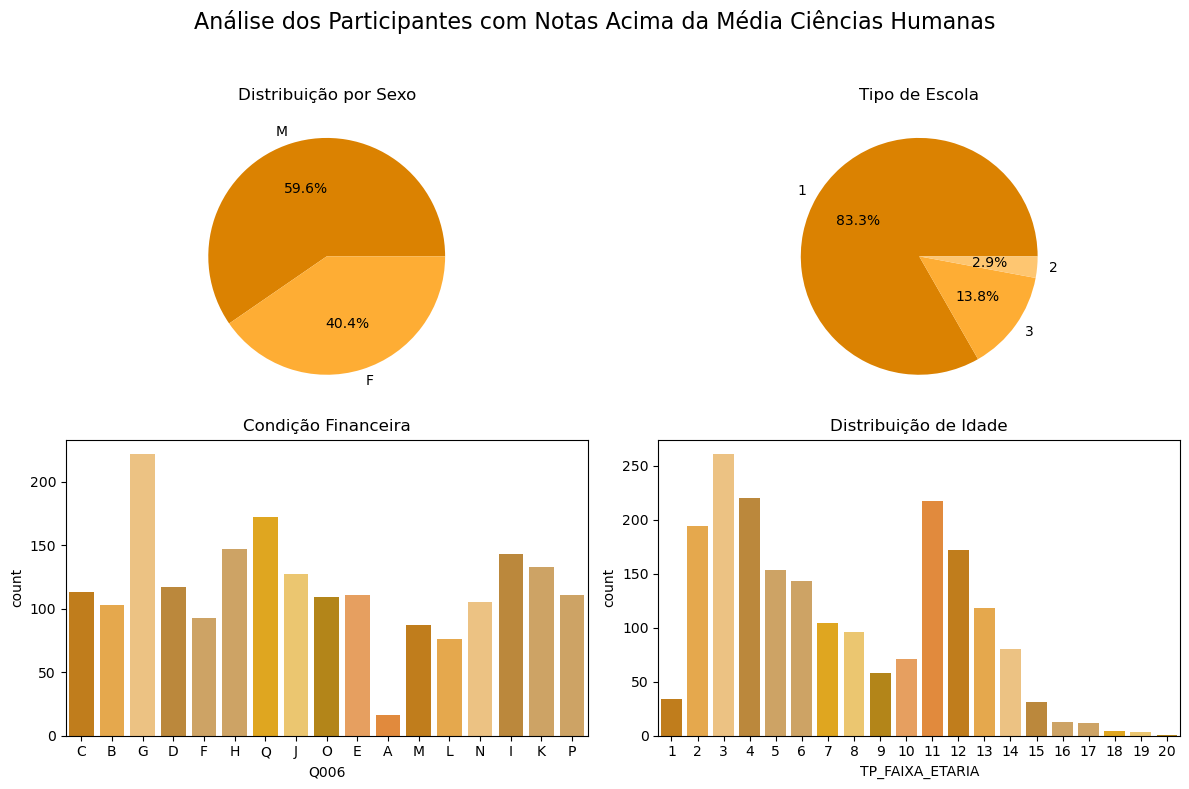

In [178]:
#Isolando notas acima do limite
Q1 = df['NU_NOTA_CH'].quantile(0.25)
Q3 = df['NU_NOTA_CH'].quantile(0.75)
IQR = Q3 - Q1

#selecionando participantes acima da média 
limite_superior = Q3 + 1.5 * IQR
altas_notas = df[df['NU_NOTA_CH'] > limite_superior]

#Criação de visualizações 

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Gráfico de pizza para sexo
sexo_counts = altas_notas['TP_SEXO'].value_counts()
axs[0, 0].pie(sexo_counts, labels=sexo_counts.index, colors=cores, autopct='%1.1f%%')
axs[0, 0].set_title('Distribuição por Sexo')

# Gráfico de pizza para tipo de escola
escola_counts = altas_notas['TP_ESCOLA'].value_counts()
axs[0, 1].pie(escola_counts, labels=escola_counts.index, colors=cores, autopct='%1.1f%%')
axs[0, 1].set_title('Tipo de Escola')

# Gráfico de barras para condição financeira
sns.countplot(data=altas_notas, x='Q006', palette=cores, ax=axs[1, 0])
axs[1, 0].set_title('Condição Financeira')

# Gráfico de barras para idade
sns.countplot(data=altas_notas, x='TP_FAIXA_ETARIA', palette=cores, ax=axs[1, 1])
axs[1, 1].set_title('Distribuição de Idade')

# Título geral
fig.suptitle('Análise dos Participantes com Notas Acima da Média Ciências Humanas', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ajusta layout para não sobrepor o título
plt.show()

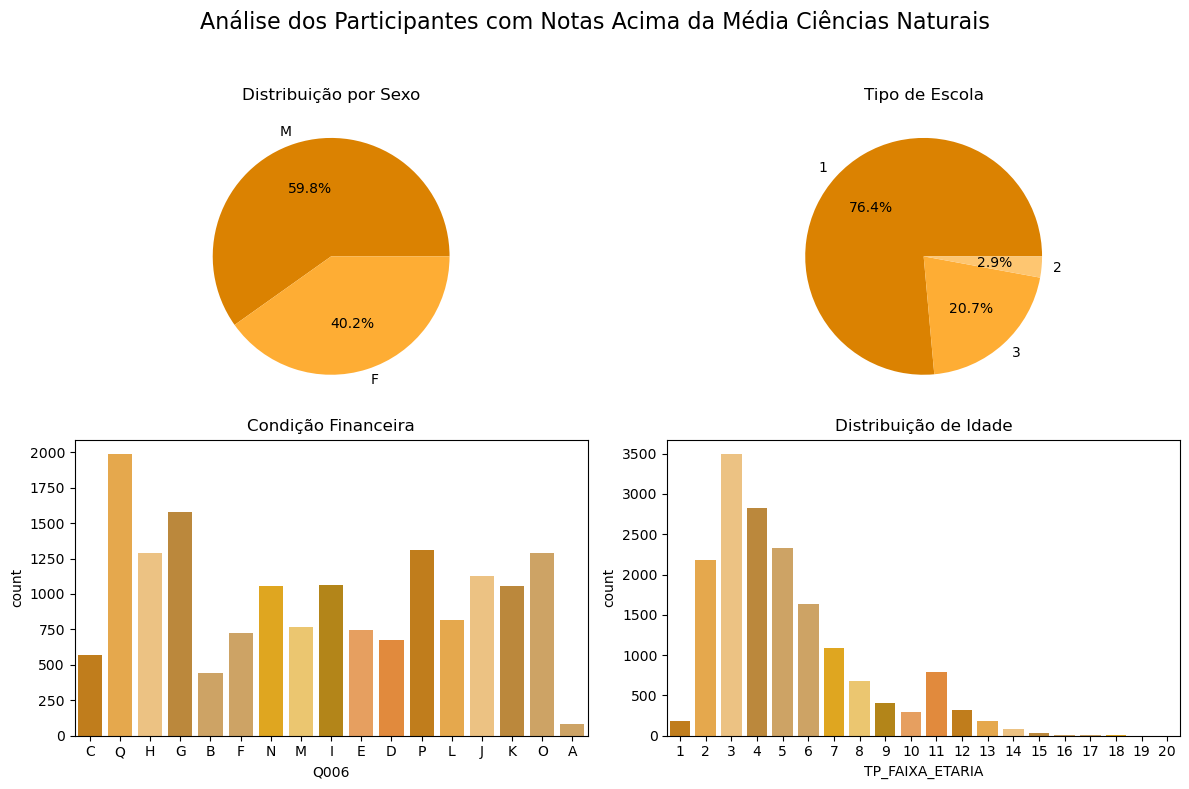

In [184]:
#Isolando notas acima do limite
Q1 = df['NU_NOTA_CN'].quantile(0.25)
Q3 = df['NU_NOTA_CN'].quantile(0.75)
IQR = Q3 - Q1

#selecionando participantes acima da média 
limite_superior = Q3 + 1.5 * IQR
altas_notas = df[df['NU_NOTA_CN'] > limite_superior]

#Criação de visualizações 

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Gráfico de pizza para sexo
sexo_counts = altas_notas['TP_SEXO'].value_counts()
axs[0, 0].pie(sexo_counts, labels=sexo_counts.index, colors=cores, autopct='%1.1f%%')
axs[0, 0].set_title('Distribuição por Sexo')

# Gráfico de pizza para tipo de escola
escola_counts = altas_notas['TP_ESCOLA'].value_counts()
axs[0, 1].pie(escola_counts, labels=escola_counts.index, colors=cores, autopct='%1.1f%%')
axs[0, 1].set_title('Tipo de Escola')

# Gráfico de barras para condição financeira
sns.countplot(data=altas_notas, x='Q006', palette=cores, ax=axs[1, 0])
axs[1, 0].set_title('Condição Financeira')

# Gráfico de barras para idade
sns.countplot(data=altas_notas, x='TP_FAIXA_ETARIA', palette=cores, ax=axs[1, 1])
axs[1, 1].set_title('Distribuição de Idade')

# Título geral
fig.suptitle('Análise dos Participantes com Notas Acima da Média Ciências Naturais', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ajusta layout para não sobrepor o título
plt.show()

A análise dos gráficos revela alguns padrões interessantes sobre o desempenho dos participantes nas diferentes provas: <br>
* Linguagem e Códigos (Português): As mulheres apresentaram desempenho ligeiramente superior ao dos homens, com maior número de participantes femininas obtendo notas acima da média.

* Matemática: Os homens se destacaram de forma mais acentuada, com um número de notas acima da média mais de 70% superior ao das mulheres.

* Demais provas: Também mostram vantagem masculina, embora com diferenças menos expressivas do que em Matemática.

* Faixa etária: A maioria dos participantes com melhor desempenho tem 18 anos, indicando que são, em geral, estudantes que já concluíram ou estão concluindo o ensino médio. Provavelmente, estão em fase de preparação para ingressar na faculdade, o que pode justificar o maior empenho e desempenho nas provas.

* Renda familiar: Há uma relação clara entre maior renda e melhor desempenho. Isso é especialmente evidente na prova de Matemática, onde os participantes pertencentes à faixa mais alta da classificação socioeconômica obtiveram as maiores notas.


Embora alguns participantes apresentem notas significativamente acima da média e possam ser considerados outliers nesta análise, optamos por mantê-los no conjunto de dados. A exclusão desses casos poderia comprometer a integridade da investigação, já que eles representam desempenhos relevantes que podem contribuir para a compreensão dos fatores associados ao sucesso. Para evitar distorções causadas por esses valores extremos, nas etapas seguintes será utilizada a mediana como medida central das notas, por ser menos sensível à influência dos outliers e oferecer uma representação mais fiel do desempenho geral dos participantes.

## <span id="analise-exploratoria-eda" style="color:#DB8201;">3. Análise Exploratória (EDA)</span>

Após compreender melhor os outliers presentes neste conjunto de dados, damos início à análise exploratória. Este processo será guiado por um conjunto de perguntas-chave que buscam extrair insights relevantes e aprofundar a compreensão sobre os dados disponíveis.

Durante toda a análise, estas serão as perguntas que orientarão minha investigação:
1. **Quem são os participantes do ENEM?**
2. **Quais são as médias gerais das notas**
3. **Há correlação entre as notas das áreas?**
4. **O tipo de escola influencia o desempenho?**
5. **Há disparidades de desempenho por sexo, raça/cor ou renda familiar?**

### <span style="color:#DB8201;">3.1 Quem são os participantes do ENEM</span>

Antes de analisar o desempenho dos participantes, é essencial compreender quem são as pessoas que prestam o Exame Nacional do Ensino Médio (ENEM). Essa etapa nos ajuda a contextualizar os resultados e identificar possíveis desigualdades ou padrões de acesso à educação. Para isso, vamos observar:


* O tipo de escola frequentada pelos participantes.

* A cor ou raça declarada.

* O sexo dos participantes.

* A distribuição geográfica dos participantes pelo Brasil.


* A faixa etária dos participantes.

* A renda familiar declarada.

* Se o participante já concluiu o ensino médio ou ainda está cursando.

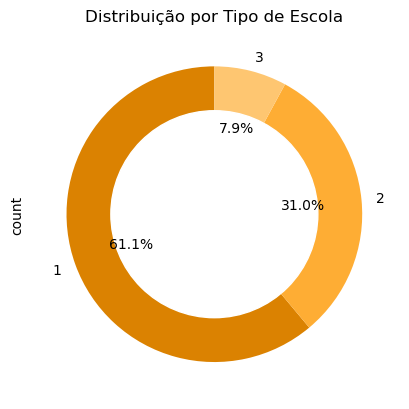

In [161]:
pizza('TP_ESCOLA')
plt.title("Distribuição por Tipo de Escola")
plt.show()

Definição dos números: <br>
1 -	Não Respondeu<br>
2 -	Pública<br>
3 -	Privada<br>

<Figure size 1400x700 with 0 Axes>

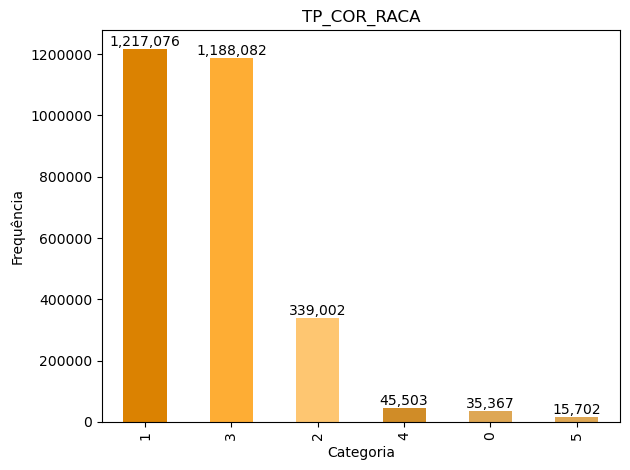

In [163]:
conta('TP_COR_RACA')

Definição Cor e Raça <br>
0 -	Não declarado<br>
1 -	Branca<br>
2 -	Preta<br>
3 -	Parda<br>
4 -	Amarela<br>
5 -	Indígena<br> 
6 -	Não dispõe da informação<br>

Com relação a cor dos participantes é possivel observar que a grande maioria das pessoas que realizaram a prova é de pessoas branca e pardas. 

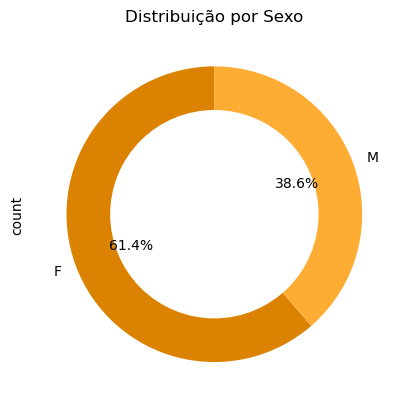

In [165]:
pizza('TP_SEXO')
plt.title("Distribuição por Sexo")
plt.show()

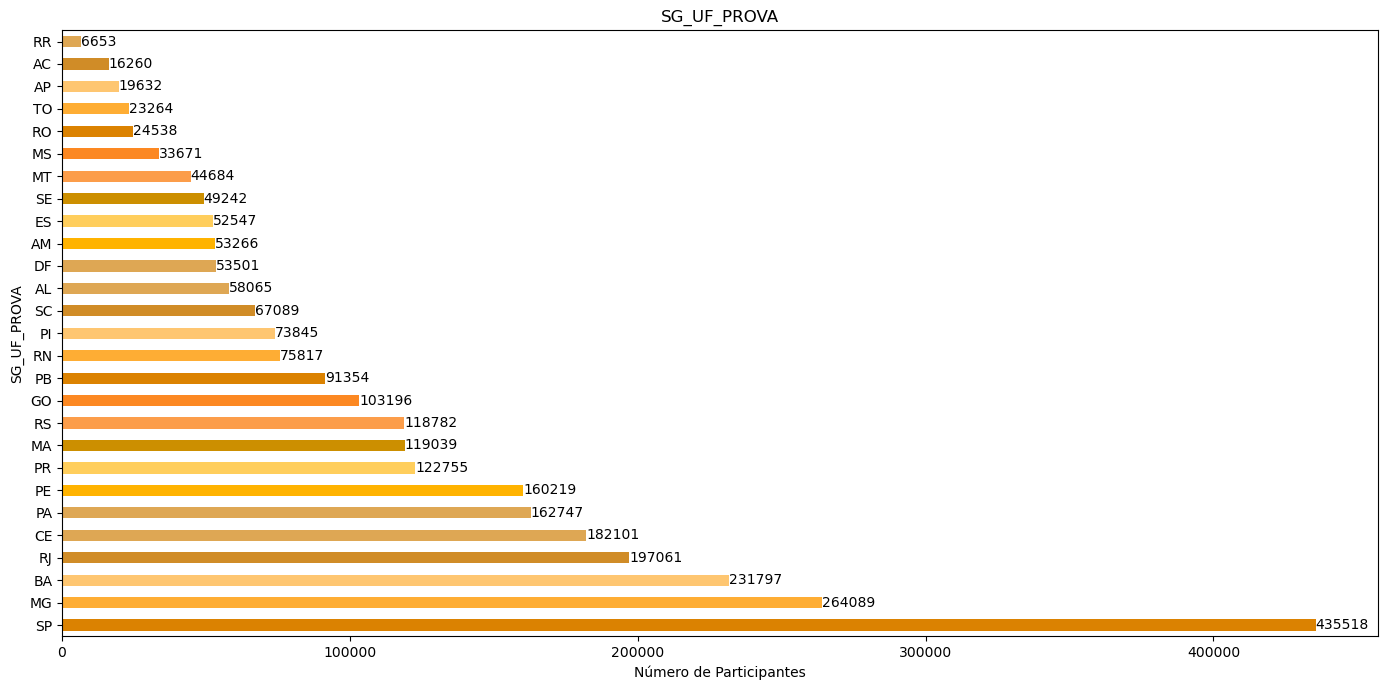

In [167]:
cont_h('SG_UF_PROVA')

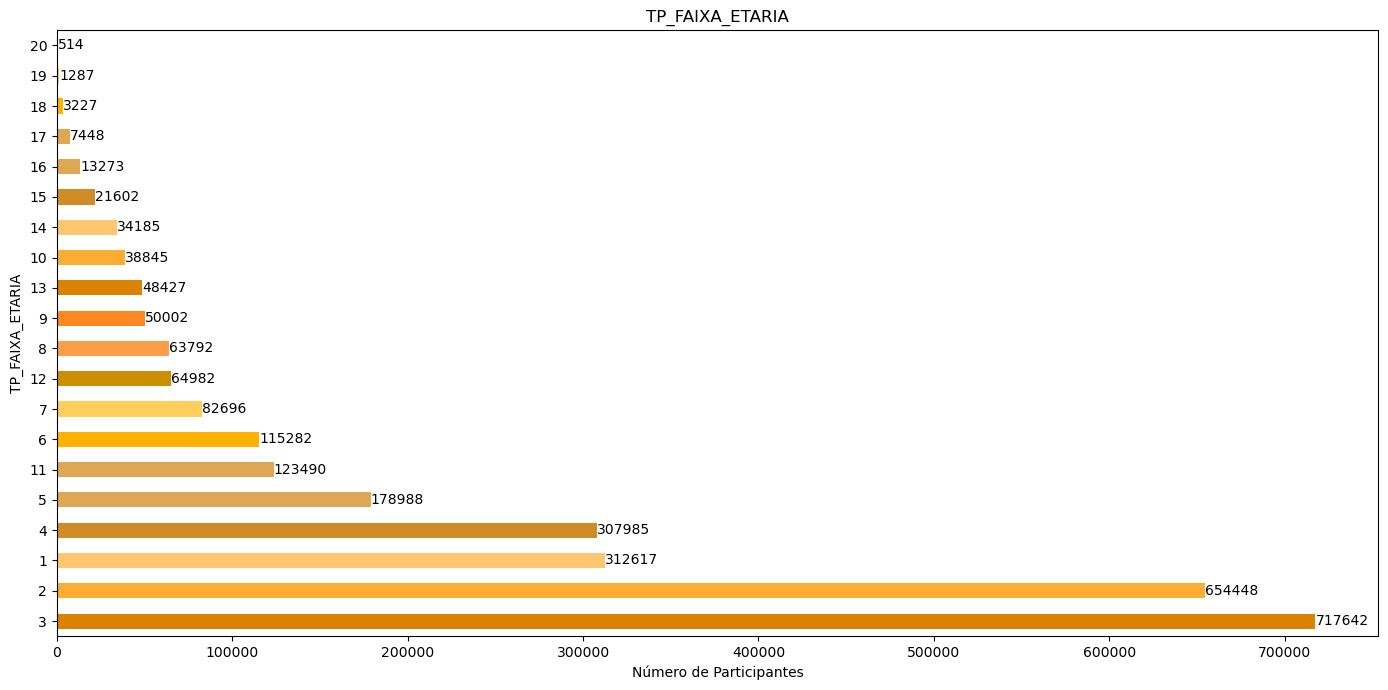

In [169]:
cont_h('TP_FAIXA_ETARIA')

Definição da faixa etária:<br> 
1 -	Menor de 17 anos<br>
2 -	17 anos<br>
3 -	18 anos<br>
4 -	19 anos<br>
5 -	20 anos<br>
6 -	21 anos<br>
7 -	22 anos<br>
8 -	23 anos<br>
9 -	24 anos<br>
10 -	25 anos<br>
11 - Entre 26 e 30 anos<br>
12 -	Entre 31 e 35 anos<br>
13 -	Entre 36 e 40 anos<br>
14 -	Entre 41 e 45 anos<br>
15 -	Entre 46 e 50 anos<br>
16 -	Entre 51 e 55 anos<br>
17 -	Entre 56 e 60 anos<br>
18 -	Entre 61 e 65 anos<br>
19 -	Entre 66 e 70 anos<br>
20 -	Maior de 70 anos<br>

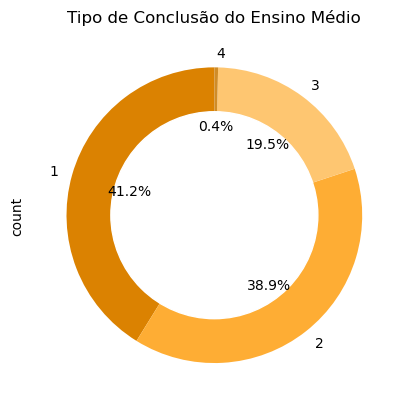

In [186]:
pizza('TP_ST_CONCLUSAO')
plt.title('Tipo de Conclusão do Ensino Médio')
plt.show()

Definição dos números:<br>
1 -	Já concluí o Ensino Médio<br>
2 -	Estou cursando e concluirei o Ensino Médio em 2023<br>
3 -	Estou cursando e concluirei o Ensino Médio após 2023<br>
4 -	Não concluí e não estou cursando o Ensino Médio<br>


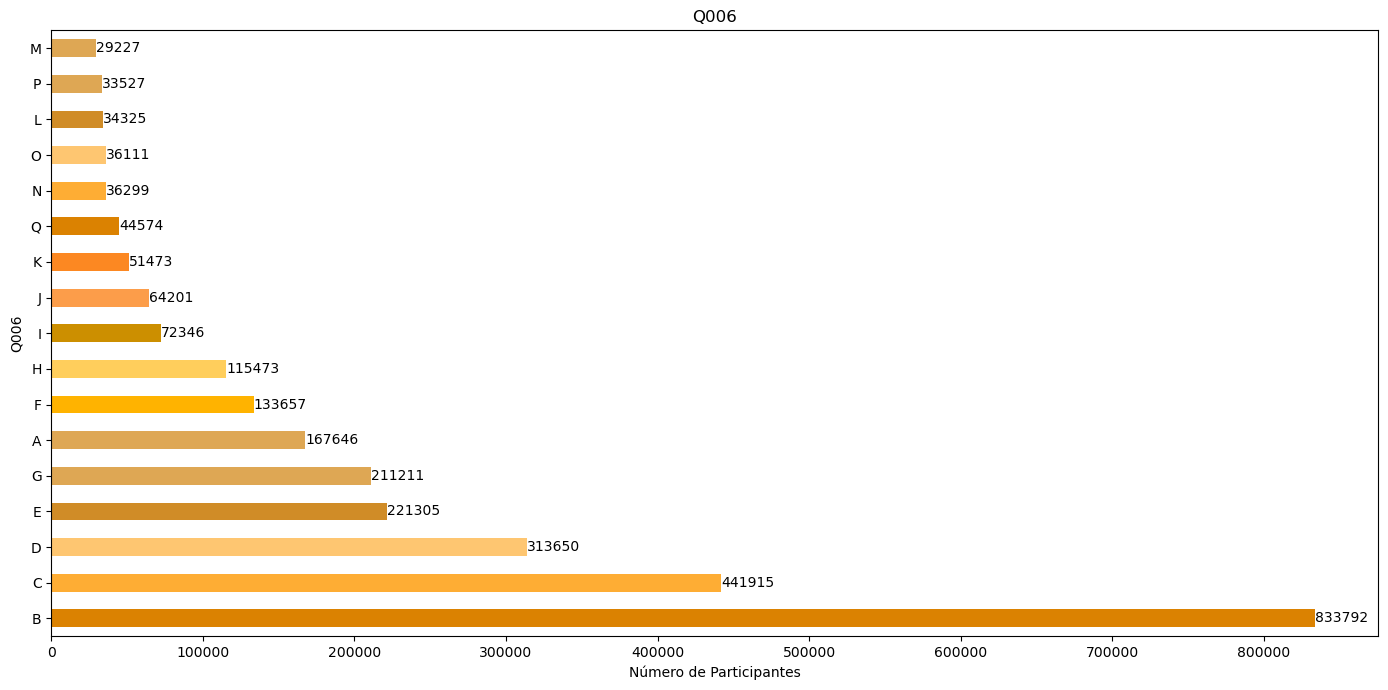

In [188]:
cont_h('Q006')

Definição do renda familiar **(Q006)**: <br>
A-	Nenhuma Renda <br>
B-	Até 1.320,00<br>
C-	De 1.320,01 até 1.980,00.<br>
D-	De 1.980,01 até 2.640,00.<br>
E-	De 2.640,01 até 3.300,00.<br>
F-	De 3.300,01 até 3.960,00.<br>
G-	De 3.960,01 até 5.280,00.<br>
H-	De 5.280,01 até 6.600,00.<br>
I-	De 6.600,01 até 7.920,00.<br>
J-	De 7.920,01 até 9240,00.<br>
K-	De 9.240,01 até 10.560,00.<br>
L-	De 10.560,01 até 11.880,00.<br>
M-	De 11.880,01 até 13.200,00.<br>
N-	De 13.200,01 até 15.840,00.<br>
O-	De 15.840,01 até 19.800,00.<br>
P-	De 19.800,01 até 26.400,00.<br>
Q-	Acima de 26.400,00.<br>

A análise exploratória dos dados do ENEM revela alguns padrões relevantes sobre o perfil dos participantes. Observa-se que mais da metade dos candidatos optou por não informar o tipo de escola frequentada, o que limita uma comparação mais precisa entre o desempenho de alunos de escolas públicas e privadas. Entre os que responderam, aproximadamente 30% são oriundos da rede pública e cerca de 8% da rede privada.

No que diz respeito à cor ou raça, cerca de 80% dos participantes se autodeclaram brancos ou pardos, enquanto menos de 12% se identificam como negros — uma distribuição que reflete, de forma geral, os dados populacionais do Censo de 2022. Além disso, as mulheres representam a maioria entre os inscritos no exame.

A distribuição geográfica mostra forte concentração de participantes no estado de São Paulo, responsável por mais de 15% dos inscritos. Em contraste, Roraima apresenta o menor número de participantes, com pouco mais de 6 mil pessoas.

Quanto à faixa etária, a maioria dos candidatos tem entre 17 e 18 anos, o que indica que boa parte está concluindo o ensino médio e pretende utilizar a nota do ENEM para ingressar no ensino superior. Em relação à renda familiar, quase 30% dos participantes vivem com um salário mínimo, e mais da metade possui renda mensal inferior a R$ 2.000,00 — evidenciando o perfil socioeconômico predominantemente de baixa renda entre os inscritos.

Em síntese, os dados analisados permitem traçar um retrato abrangente dos participantes do ENEM, destacando aspectos sociais, econômicos e regionais que ajudam a compreender melhor o contexto educacional brasileiro.

### <span style="color:#DB8201;">3.2 Quais são as médias gerais das notas</span>

Após compreender o perfil dos participantes do ENEM — incluindo aspectos como faixa etária, tipo de escola, cor, gênero, renda familiar e distribuição geográfica — é hora de avançar para a análise do desempenho acadêmico. Neste tópico, vamos observar as médias gerais das notas obtidas nas diferentes áreas avaliadas pelo exame.

Essa etapa é fundamental para identificar quais competências apresentam maior domínio por parte dos candidatos e quais exigem maior atenção. Ao analisar as médias, também poderemos comparar o desempenho entre as provas e levantar hipóteses sobre os fatores que influenciam os resultados. Para garantir maior precisão, utilizaremos a mediana como medida central, já que ela é menos afetada por valores extremos e oferece uma visão mais equilibrada do desempenho geral.

Primeiro então vamos verificar como os alunos se saem nas notas das provas por tipo de escola. 

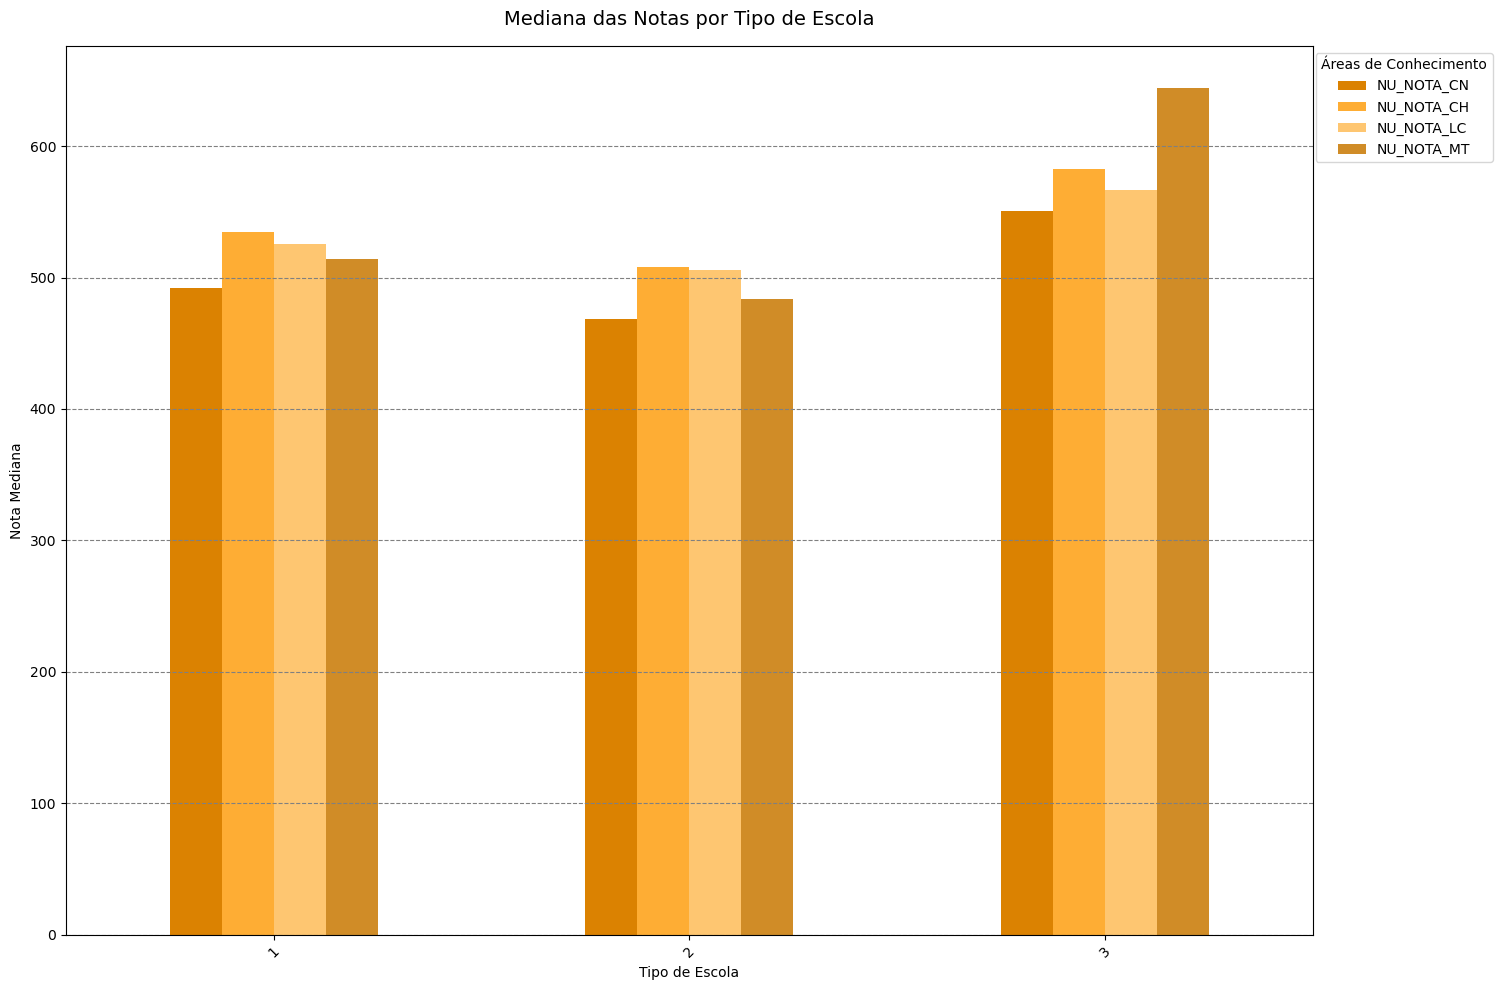

In [198]:
# Cria o gráfico
ax = df.groupby('TP_ESCOLA')[['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT']].median().plot(
    kind='bar', 
    color=cores, 
    figsize=(15, 10)  
)

# Ajustes de título e eixos
plt.title('Mediana das Notas por Tipo de Escola', fontsize=14, pad=15)
plt.ylabel('Nota Mediana')
plt.xlabel('Tipo de Escola')
plt.grid(True, linestyle='--', color='gray', axis='y')
plt.xticks(rotation=45)

#  Posição da legenda
plt.legend(
    title='Áreas de Conhecimento',
    loc='upper right',      
    bbox_to_anchor=(1.15, 1)  
)

plt.tight_layout()
plt.show()

A análise do gráfico acima revela padrões marcantes na distribuição das medianas das notas entre os diferentes tipos de escola. As instituições particulares mantêm uma vantagem consistente sobre as públicas, com desempenho superior em todas as áreas avaliadas. Um contraste curioso surge ao observar as disciplinas com melhores resultados: enquanto os alunos da rede pública alcançaram sua maior mediana em **Ciências Humanas**, os da rede privada brilharam em **Matemática**, com notas significativamente mais altas.

Apesar dessas diferenças, há uma semelhança que atravessa os dois grupos: **Ciências da Natureza** aparece como a disciplina mais desafiadora para os participantes, registrando as menores medianas em ambos os tipos de escola. O destaque de **Matemática** nas escolas particulares merece atenção. A diferença expressiva nas notas pode refletir uma preparação mais direcionada, maior acesso a recursos pedagógicos ou até mesmo uma cultura escolar que valoriza fortemente o desempenho nessa área.

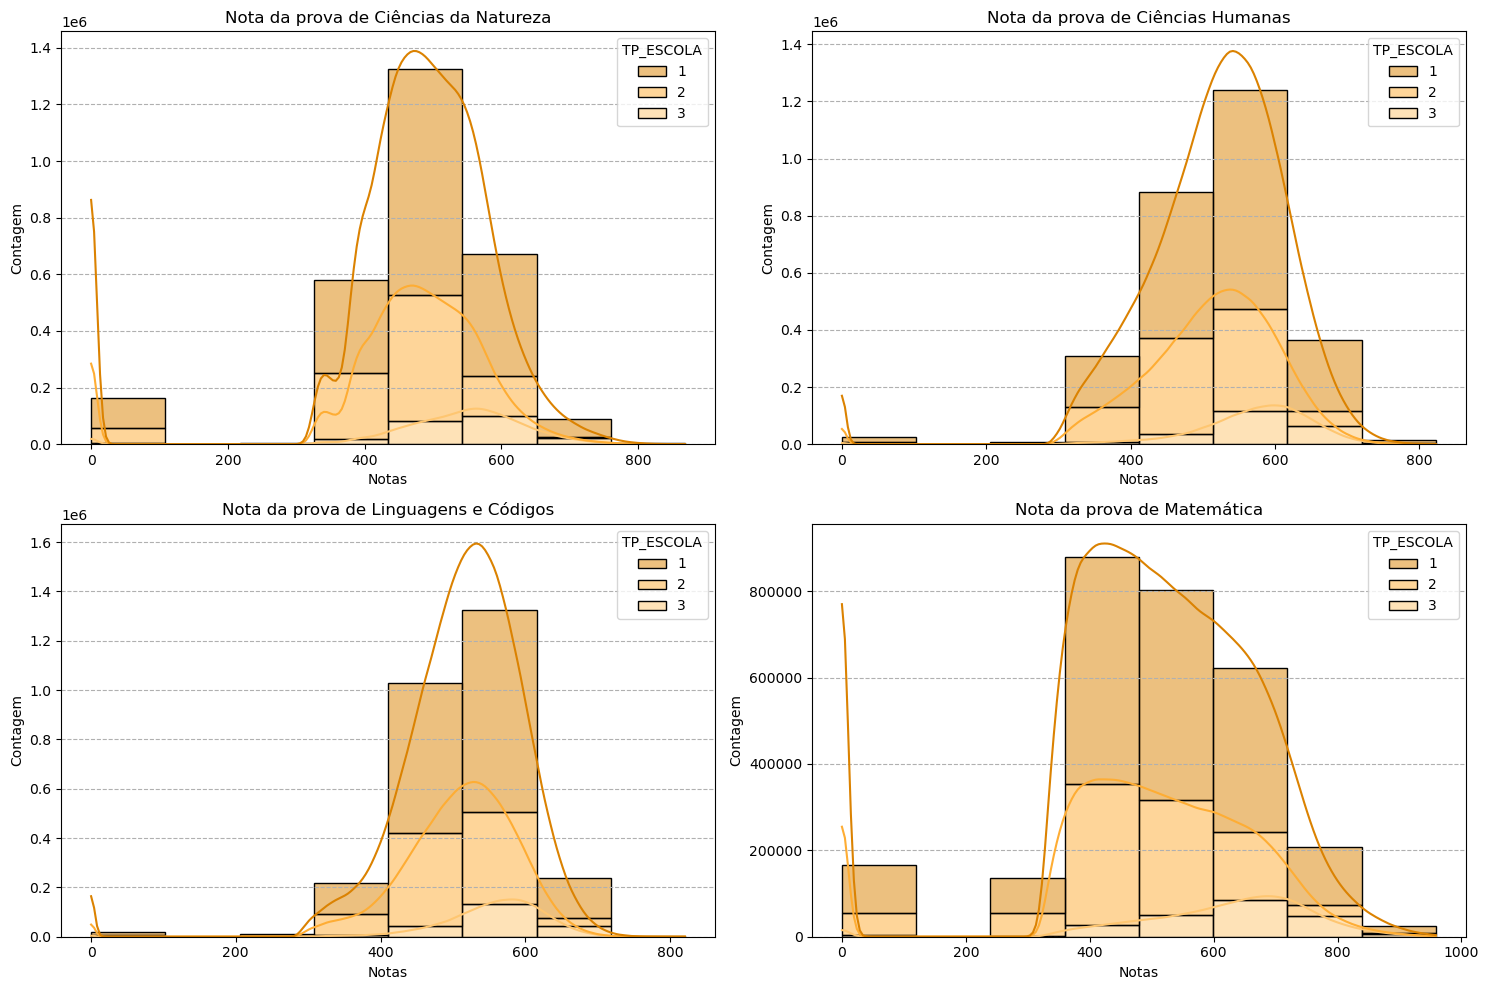

In [200]:
# Criar subplots lado a lado
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Primeiro scatter plot
sns.histplot(data=df, x='NU_NOTA_CN', hue='TP_ESCOLA',palette = cores, bins=8, kde=True, multiple='stack', ax=axs[0, 0])

axs[0, 0].set_title('Nota da prova de Ciências da Natureza')
axs[0, 0].set_xlabel('Notas')
axs[0, 0].set_ylabel('Contagem')

# Segundo scatter plot
sns.histplot(data=df, x='NU_NOTA_CH', hue='TP_ESCOLA',palette = cores, bins=8, kde=True, multiple='stack',ax=axs[0, 1])

axs[0, 1].set_title('Nota da prova de Ciências Humanas')
axs[0, 1].set_xlabel('Notas')
axs[0, 1].set_ylabel('Contagem')

# Primeiro scatter plot
sns.histplot(data=df, x='NU_NOTA_LC', hue='TP_ESCOLA',palette = cores, bins=8, kde=True, multiple='stack', ax=axs[1, 0])

axs[1, 0].set_title('Nota da prova de Linguagens e Códigos')
axs[1, 0].set_xlabel('Notas')
axs[1, 0].set_ylabel('Contagem')

# Primeiro scatter plot
sns.histplot(data=df, x='NU_NOTA_MT', hue='TP_ESCOLA',palette = cores, bins=8, kde=True, multiple='stack', ax=axs[1, 1])

axs[1, 1].set_title('Nota da prova de Matemática')
axs[1, 1].set_xlabel('Notas')
axs[1, 1].set_ylabel('Contagem')


# Adicionando grid apenas no eixo Y com estilo '--'
for ax in (axs[0, 0], axs[0, 1], axs[1, 0], axs[1, 1]):
    ax.grid(axis='y', linestyle='--')
    
# Exibindo o gráfico
plt.tight_layout()
plt.show()

A leitura dos gráficos revela um padrão curioso: em grande parte das disciplinas, as notas dos participantes se agrupam em torno da média, formando distribuições que, em alguns casos, chegam a se aproximar de uma simetria quase perfeita. No entanto, esse equilíbrio aparente esconde um detalhe importante — há uma concentração significativa de notas muito baixas, especialmente próximas de zero, em determinadas provas. Esse fenômeno cria uma cauda à esquerda nas distribuições, evidenciando que uma parcela dos participantes enfrentou grandes dificuldades.

Esse comportamento estatístico não apenas revela desigualdades no desempenho, mas também levanta questões sobre o acesso à preparação adequada e os desafios enfrentados por diferentes perfis de estudantes. Para aprofundar essa análise, vamos agora observar como essas notas se distribuem por estado, buscando identificar padrões regionais que possam explicar parte dessas variações.

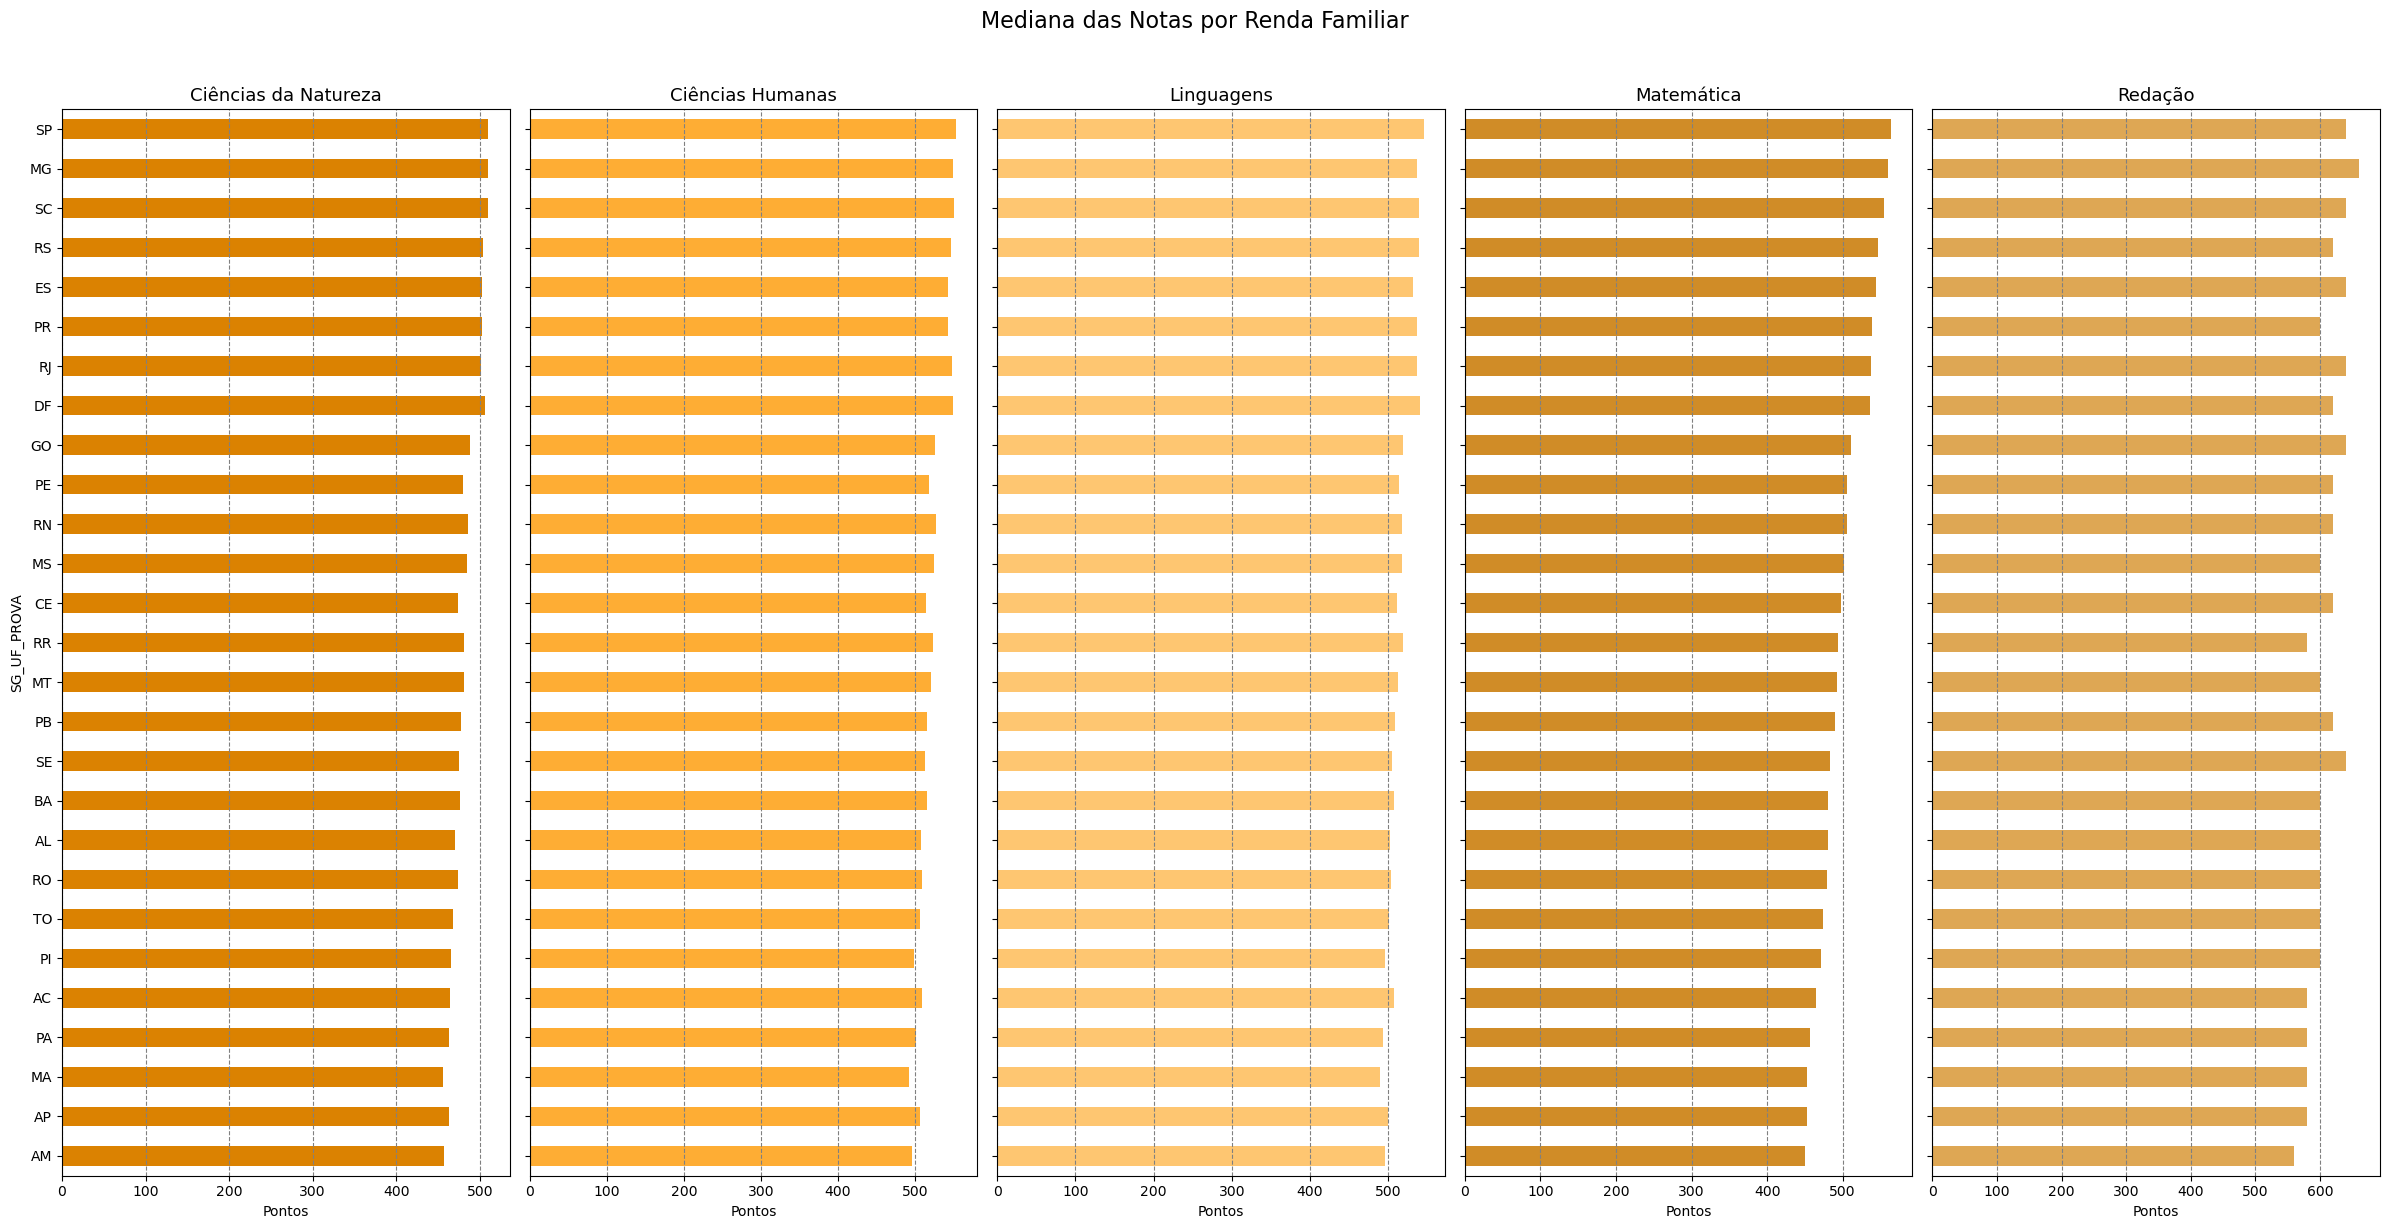

In [61]:
# Lista das provas e títulos
provas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']
titulos = ['Ciências da Natureza', 'Ciências Humanas', 'Linguagens', 'Matemática', 'Redação']

# Define ordem fixa dos estados com base em uma das provas
ordem_estados = df.groupby('SG_UF_PROVA')['NU_NOTA_MT'].median().sort_values().index

# Cria subplots
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(24, 12), sharey=True)

for i, prova in enumerate(provas):
    # Calcula mediana por estado e reordena
    notas_por_estado = df.groupby('SG_UF_PROVA')[prova].median().reindex(ordem_estados)
    
    # Plota
    notas_por_estado.plot(
        kind='barh',
        ax=axes[i],
        color=cores[i] if isinstance(cores, list) else 'skyblue'
    )
    
    axes[i].set_title(f'{titulos[i]}', fontsize=13)
    axes[i].set_xlabel('Pontos')
    axes[i].grid(True, linestyle='--', color='gray', axis='x')

# Título geral
fig.suptitle('Mediana das Notas por Renda Familiar', fontsize=16, y=1.02)

# Layout ajustado
plt.tight_layout()
plt.show()

A análise por estado também oferece insights importantes sobre os desafios regionais na educação. Em alguns estados, a mediana das notas não atingiu os 500 pontos em nenhuma das provas, enquanto em outros, todas as medianas superaram os 500 pontos. Embora esse valor não seja um parâmetro oficial de desempenho, ele serve como referência comparativa, já que 500 representa um pouco mais da metade da escala — assim como a média 6 costuma ser o mínimo necessário para aprovação em muitas redes de ensino.

Reforçando a dificuldade com Ciências da Natureza, apenas 7 estados apresentaram medianas acima de 500 pontos nessa disciplina, o que reforça seu caráter desafiador para os participantes. 

Vamos analisar agora como a renda familiar pode afetar as notas. 

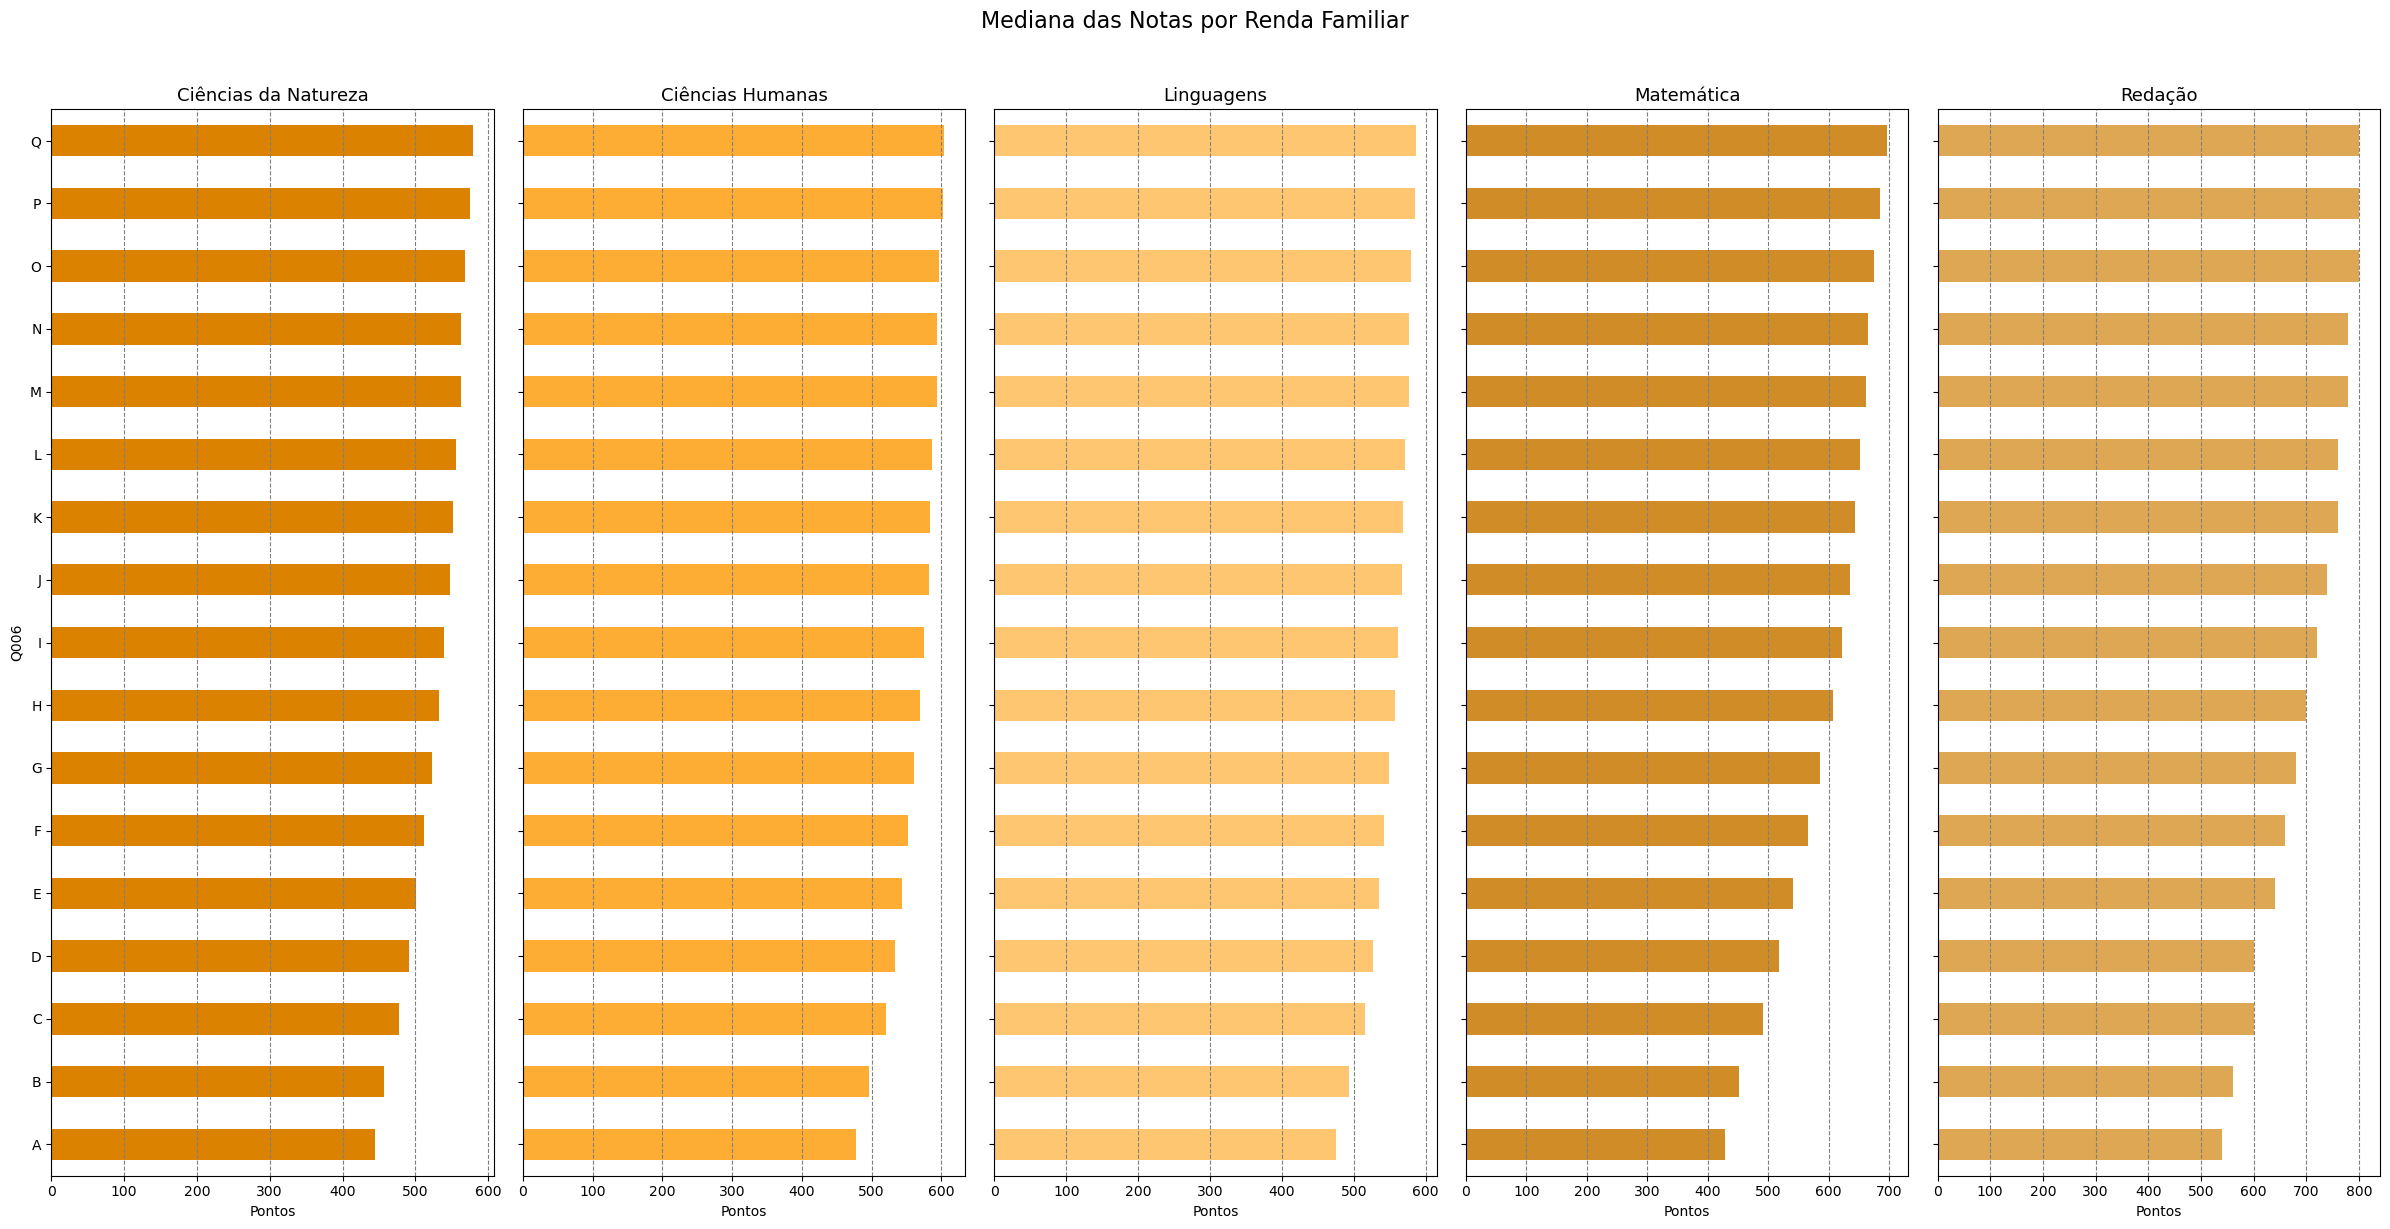

In [59]:
# Lista das provas e títulos
provas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']
titulos = ['Ciências da Natureza', 'Ciências Humanas', 'Linguagens', 'Matemática', 'Redação']

# Define ordem fixa dos estados com base em uma das provas
ordem_estados = df.groupby('Q006')['NU_NOTA_MT'].median().sort_values().index

# Cria subplots
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(24, 12), sharey=True)

for i, prova in enumerate(provas):
    # Calcula mediana por estado e reordena
    notas_por_estado = df.groupby('Q006')[prova].median().reindex(ordem_estados)
    
    # Plota
    notas_por_estado.plot(
        kind='barh',
        ax=axes[i],
        color=cores[i] if isinstance(cores, list) else 'skyblue'
    )
    
    axes[i].set_title(f'{titulos[i]}', fontsize=13)
    axes[i].set_xlabel('Pontos')
    axes[i].grid(True, linestyle='--', color='gray', axis='x')

# Título geral
fig.suptitle('Mediana das Notas por Renda Familiar', fontsize=16, y=1.02)

# Layout ajustado
plt.tight_layout()
plt.show()


A análise mostra uma tendência clara: participantes com maior renda familiar tendem a obter notas mais altas em todas as disciplinas. Os destaques mais expressivos aparecem em Matemática, com medianas próximas a 700 pontos, e em Redação, onde as notas chegam a quase 800 pontos entre os grupos com renda mais elevada.

Esses resultados sugerem que a condição socioeconômica pode influenciar o desempenho dos alunos, possivelmente por fatores como acesso a recursos educacionais, tempo dedicado aos estudos ou ambiente de aprendizagem. Por outro lado, os participantes com menor renda familiar apresentam medianas mais baixas, o que pode refletir desafios adicionais enfrentados no processo de aprendizagem.

Embora os dados não expliquem todas as causas, eles ajudam a entender como diferentes faixas de renda se relacionam com os resultados obtidos nas provas.

### <span style="color:#DB8201;">3.3 Há correlação entre as notas das áreas?</span>

Nesta etapa da análise, o objetivo é investigar se há relação entre o desempenho dos participantes nas diferentes áreas de conhecimento avaliadas. Ou seja, queremos entender se os alunos que vão bem em uma disciplina tendem a apresentar bom desempenho nas demais, ou se os resultados variam de forma independente entre as áreas.

Analisar a correlação entre as notas pode revelar padrões importantes, como a consistência no desempenho individual, possíveis afinidades entre disciplinas, ou até mesmo indicar quais áreas exigem abordagens pedagógicas distintas. Essa investigação contribui para uma compreensão mais ampla do perfil dos participantes e pode oferecer insights relevantes para estratégias educacionais.

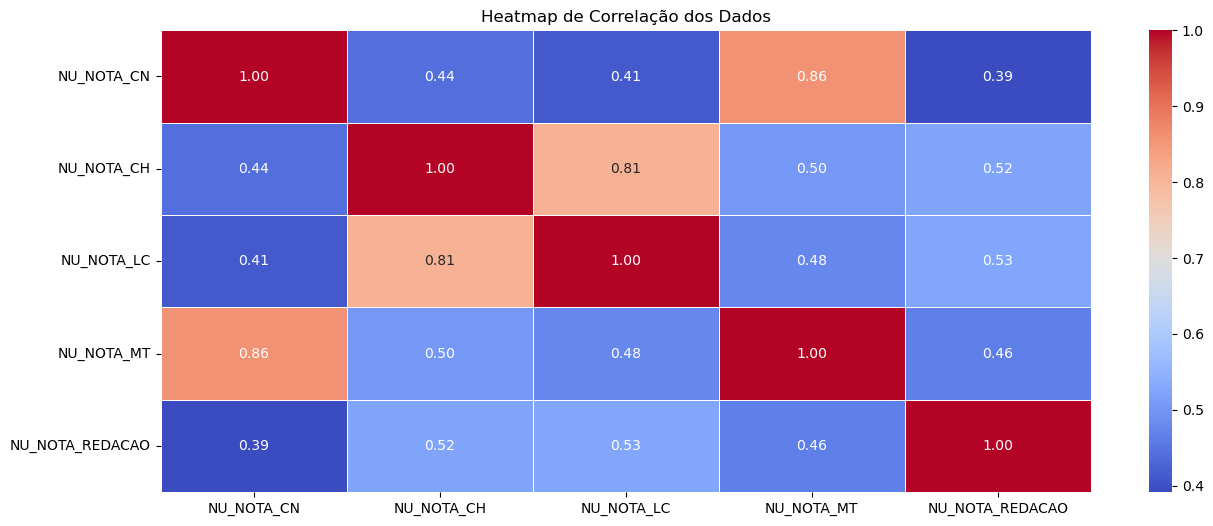

In [243]:
features = df[['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO']]

# Calculando a matriz de correlação
corr = features.corr()

# Criando o heatmap
plt.figure(figsize=(15, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Adicionando títulos
plt.title('Heatmap de Correlação dos Dados')

# Mostrando o gráfico
plt.show()

Os dados revelam uma forte correlação entre as notas de **Matemática** e **Ciências da Natureza**, com um coeficiente de 0.86. Isso indica que os participantes que apresentam bom desempenho em uma dessas áreas têm alta probabilidade de se sair bem na outra, o que pode refletir habilidades cognitivas compartilhadas, como raciocínio lógico, resolução de problemas e interpretação de fenômenos quantitativos.

Também foi observada uma correlação significativa entre **Ciências Humanas** e **Linguagens e Códigos**, o que pode estar relacionado à natureza das disciplinas — ambas exigem competências como leitura, interpretação de textos, argumentação e análise crítica, características mais associadas ao campo das ciências humanas e sociais.

Em relação à **Redação**, os dados apontam uma correlação moderada (coeficiente de 0.5) com **Ciências Humanas** e **Linguagens e Códigos**, sugerindo que o desempenho na produção textual pode estar parcialmente relacionado às habilidades desenvolvidas nessas áreas, como organização de ideias, domínio da linguagem e capacidade de argumentação.

Essas correlações contribuem para compreender como o desempenho dos participantes se distribui entre as diferentes áreas do conhecimento e oferecem indicativos de afinidades cognitivas que podem orientar estratégias pedagógicas e análises educacionais mais aprofundadas.

### <span style="color:#DB8201;">3.4 O tipo de escola influencia o desempenho?</span>


Ao se aprofundar nos dados do Enem, uma pergunta inevitável surge: o tipo de escola realmente determina o desempenho dos estudantes? Como vimos no ponto 2, as médias gerais das notas revelam uma vantagem clara para os alunos de escolas particulares. Em todas as áreas da prova — de linguagens à matemática — os estudantes da rede privada se destacam em relação aos da rede pública.

Mas será que essa superioridade se repete em todas as regiões do país? A realidade educacional brasileira é marcada por contrastes, e nem sempre os resultados seguem um padrão uniforme. Além disso, dentro da própria rede pública, existem diferentes tipos de instituições — como escolas técnicas, institutos federais e colégios militares — que muitas vezes apresentam desempenho acima da média.

Essa seção busca explorar essas nuances: entender como o tipo de escola influencia as notas, identificar possíveis exceções à regra e refletir sobre o papel do contexto socioeconômico na trajetória dos estudantes.

Por isso vamos começar análisar as notas das escolas particulares pelo pais, e ver a comparação com a rede publica.

Nesta seção, vamos explorar como o tipo de escola — pública ou privada — se relaciona com as médias das notas, considerando também o contexto socioeconômico dos alunos e possíveis exceções à regra. Afinal, embora os dados mostrem que escolas particulares costumam apresentar melhores resultados, há instituições públicas que se destacam e desafiam essa tendência.


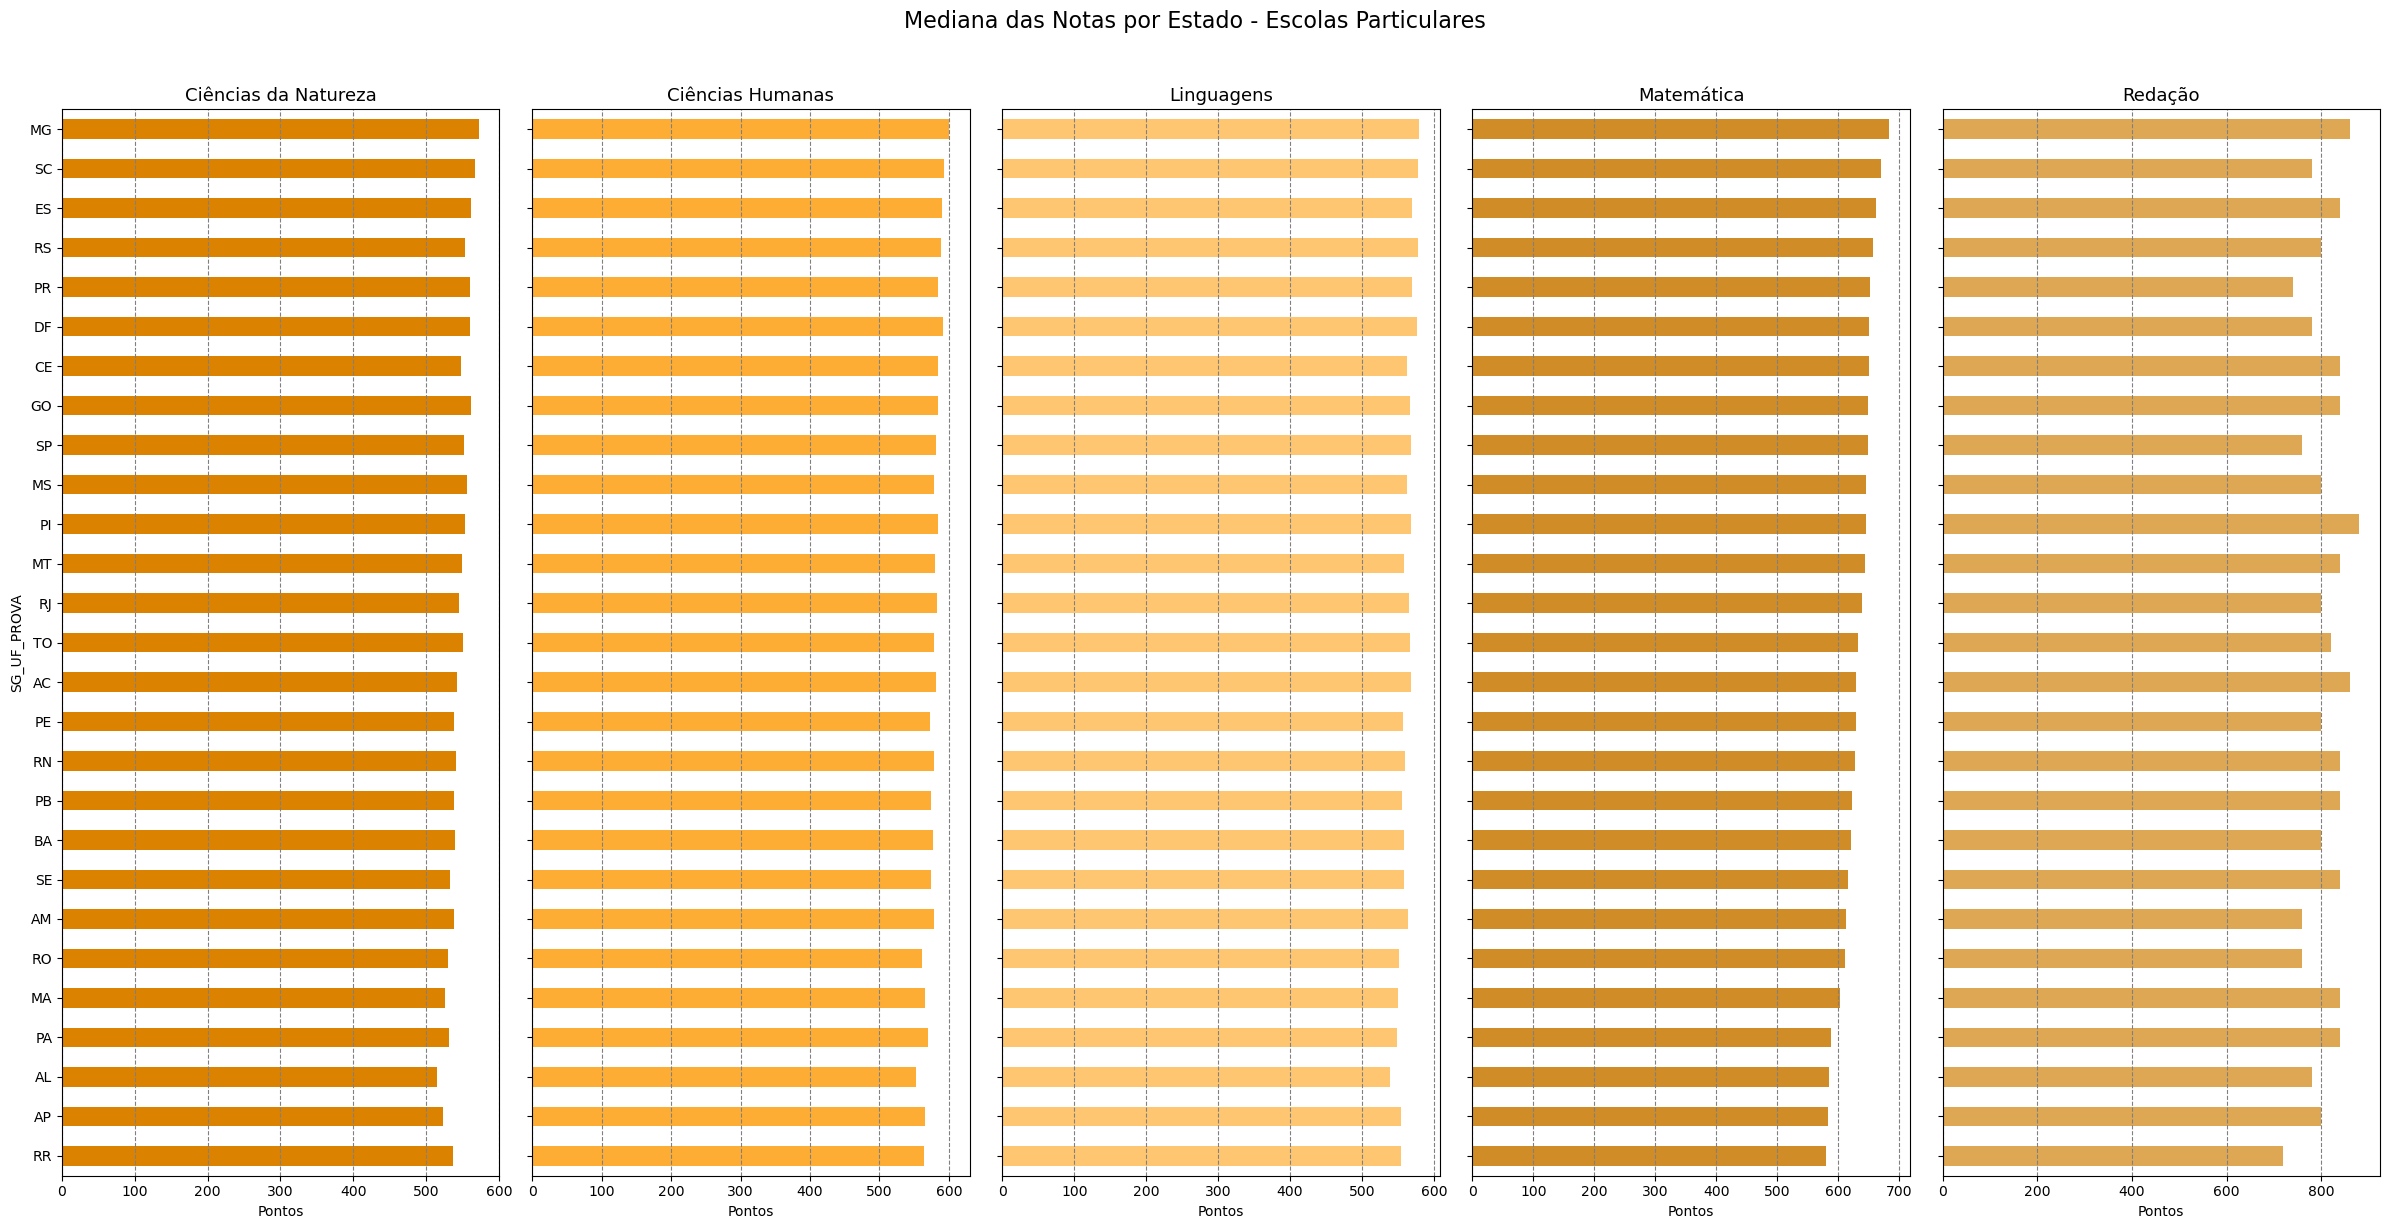

In [75]:
# Filtra apenas escolas particulares
e_particular = df.loc[df['TP_ESCOLA'] == 3]

# Lista das provas e títulos
provas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']
titulos = ['Ciências da Natureza', 'Ciências Humanas', 'Linguagens', 'Matemática', 'Redação']

# Define ordem fixa dos estados com base em uma das provas
ordem_estados = e_particular.groupby('SG_UF_PROVA')['NU_NOTA_MT'].median().sort_values().index

# Cria subplots
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(24, 12), sharey=True)

for i, prova in enumerate(provas):
    # Calcula mediana por estado e reordena
    notas_por_estado = e_particular.groupby('SG_UF_PROVA')[prova].median().reindex(ordem_estados)
    
    # Plota
    notas_por_estado.plot(
        kind='barh',
        ax=axes[i],
        color=cores[i] if isinstance(cores, list) else 'skyblue'
    )
    
    axes[i].set_title(f'{titulos[i]}', fontsize=13)
    axes[i].set_xlabel('Pontos')
    axes[i].grid(True, linestyle='--', color='gray', axis='x')

# Título geral
fig.suptitle('Mediana das Notas por Estado - Escolas Particulares', fontsize=16, y=1.02)

# Layout ajustado
plt.tight_layout()
plt.show()

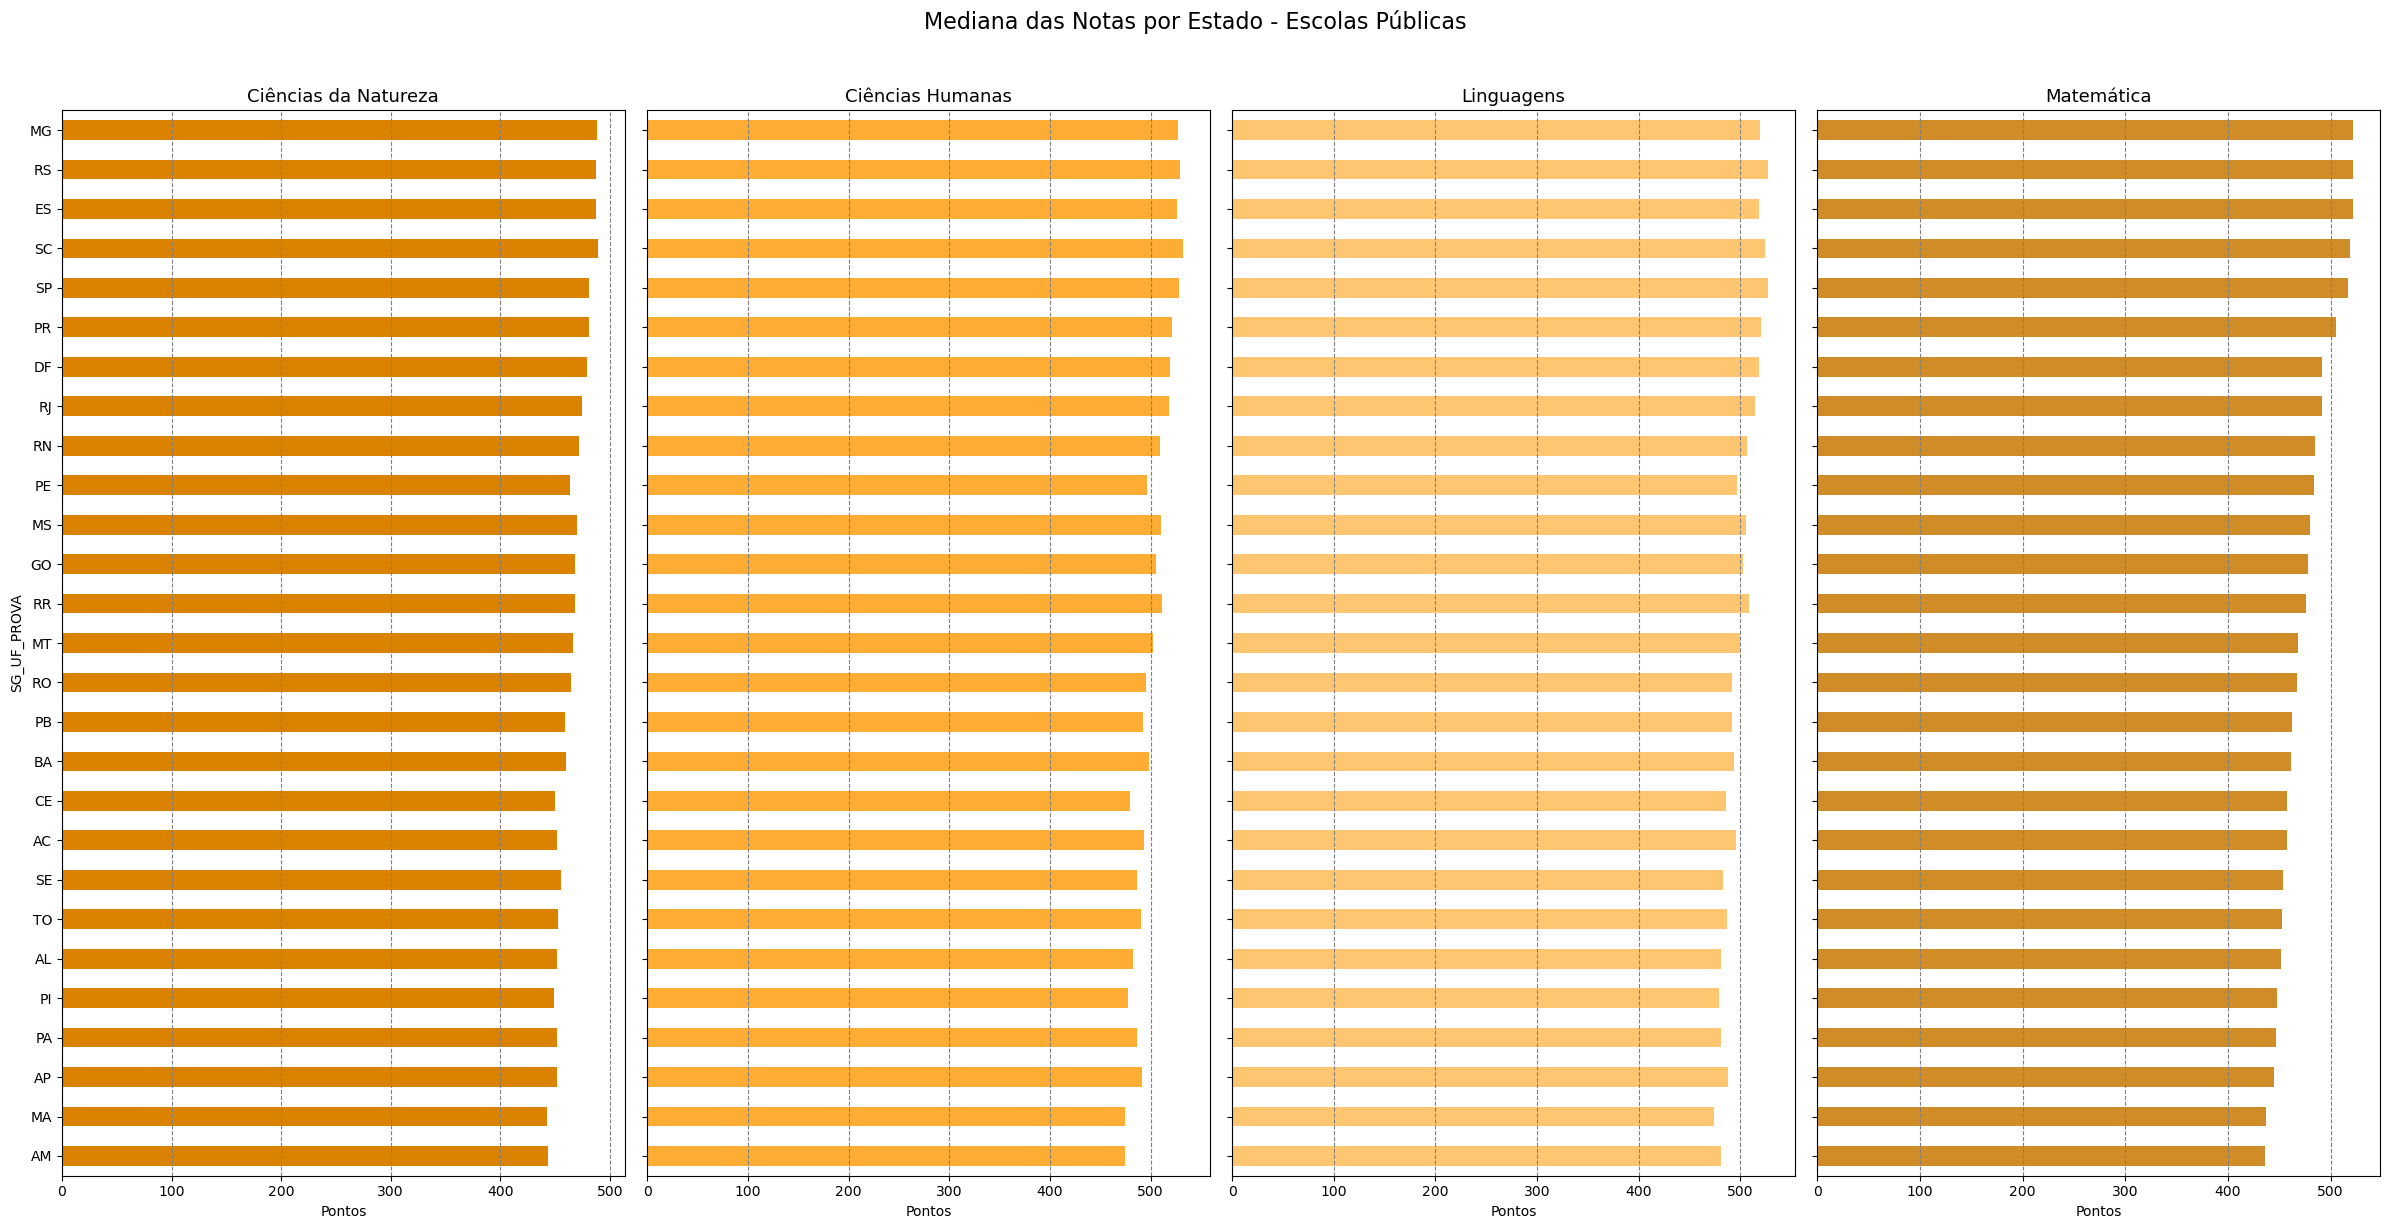

In [41]:
# Filtra apenas escolas particulares
e_particular = df.loc[df['TP_ESCOLA'] == 2]

# Lista das provas e títulos
provas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']
titulos = ['Ciências da Natureza', 'Ciências Humanas', 'Linguagens', 'Matemática']

# Define ordem fixa dos estados com base em uma das provas
ordem_estados = e_particular.groupby('SG_UF_PROVA')['NU_NOTA_MT'].median().sort_values().index

# Cria subplots
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(24, 12), sharey=True)

for i, prova in enumerate(provas):
    # Calcula mediana por estado e reordena
    notas_por_estado = e_particular.groupby('SG_UF_PROVA')[prova].median().reindex(ordem_estados)
    
    # Plota
    notas_por_estado.plot(
        kind='barh',
        ax=axes[i],
        color=cores[i] if isinstance(cores, list) else 'skyblue'
    )
    
    axes[i].set_title(f'{titulos[i]}', fontsize=13)
    axes[i].set_xlabel('Pontos')
    axes[i].grid(True, linestyle='--', color='gray', axis='x')

# Título geral
fig.suptitle('Mediana das Notas por Estado - Escolas Públicas', fontsize=16, y=1.02)

# Layout ajustado
plt.tight_layout()
plt.show()

A leitura dos gráficos revela uma certa estabilidade nas notas das escolas particulares: embora alguns estados apresentem desempenhos ligeiramente mais baixos, a maioria mantém médias acima dos 500 pontos em todas as áreas avaliadas. Essa consistência reforça a vantagem já observada em relação às escolas públicas, cujas notas tendem a ser mais dispersas e, em muitos casos, inferiores.

Ao comparar os resultados por disciplina, surgem contrastes marcantes. Em Matemática, por exemplo, a diferença entre estados é evidente: Minas Gerais se destaca com uma mediana significativamente superior à de estados como o Amazonas, evidenciando não apenas a força da rede privada, mas também desigualdades regionais no acesso à educação de qualidade.


Agora iremos olhar mais para as escolas públicas e ver se existe alguma diferença entre as notas e a dependência administrativa da escola.

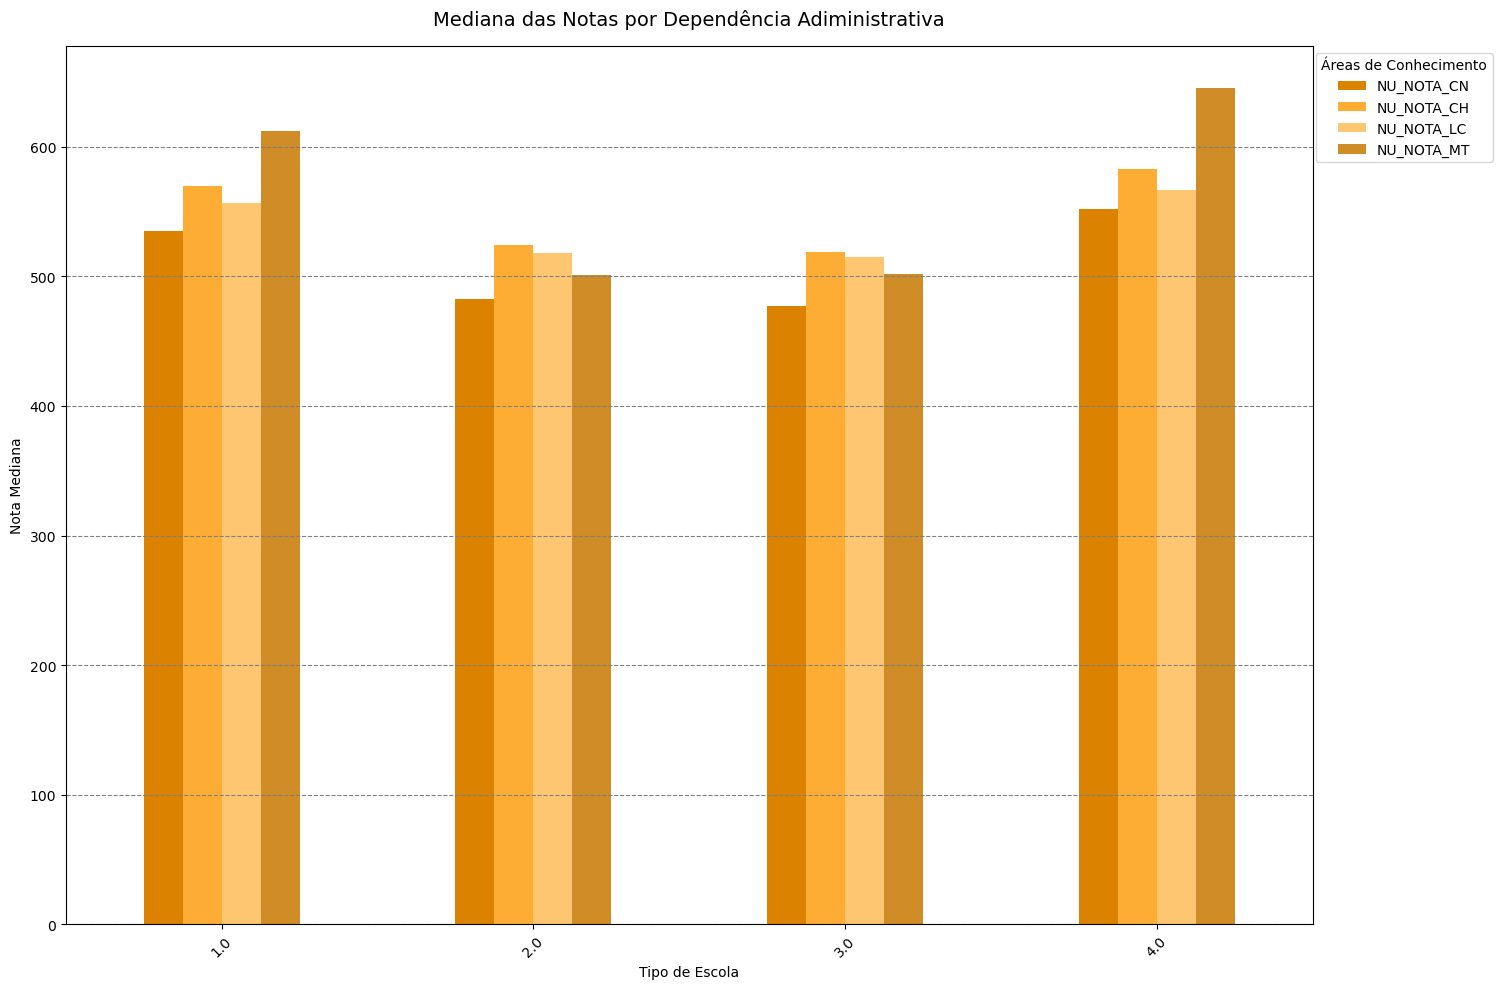

In [84]:
df.groupby('TP_DEPENDENCIA_ADM_ESC')[['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT']].median().plot(
    kind='bar', 
    color=cores, 
    figsize=(15, 10)  
)

# Ajustes de título e eixos
plt.title('Mediana das Notas por Dependência Adiministrativa', fontsize=14, pad=15)
plt.ylabel('Nota Mediana')
plt.xlabel('Tipo de Escola')
plt.grid(True, linestyle='--', color='gray', axis='y')
plt.xticks(rotation=45)

#  Posição da legenda
plt.legend(
    title='Áreas de Conhecimento',
    loc='upper right',      
    bbox_to_anchor=(1.15, 1)  
)

plt.tight_layout()
plt.show()



Tipo de Dependência administrativa:<br>
1	Federal<br>
2	Estadual<br>
3	Municipal<br>
4	Privada<br>


Mais uma vez, os dados deixam claro: as escolas privadas continuam liderando nas medianas das notas do Enem. No entanto, um grupo dentro da rede pública chama atenção — as escolas federais. Seus resultados se aproximam, e em alguns casos até rivalizam, com os das instituições particulares.

Esse desempenho não é por acaso. Muitas escolas federais, como os Institutos Federais (IFs) e os colégios militares, adotam processos seletivos rigorosos para ingresso no ensino médio. Isso significa que os alunos que entram já possuem um histórico acadêmico sólido, o que naturalmente eleva a média geral da escola.

Além disso, a rede federal recebe mais investimento por aluno do que a estadual, o que se traduz em laboratórios bem equipados, bibliotecas atualizadas, acesso à tecnologia e infraestrutura de qualidade. Os professores também contam com salários mais altos e maior estabilidade, fatores que contribuem para a qualificação e continuidade do corpo docente.

O resultado de tudo isso é visível nos gráficos: as escolas federais se destacam como verdadeiros polos de excelência dentro da rede pública, mostrando que, com estrutura e investimento adequados, é possível alcançar altos níveis de desempenho.

Agora vamos analisar o desempenho das escolas rurais e ver como elas se saem com relação às escolas nas áreas urbanas.

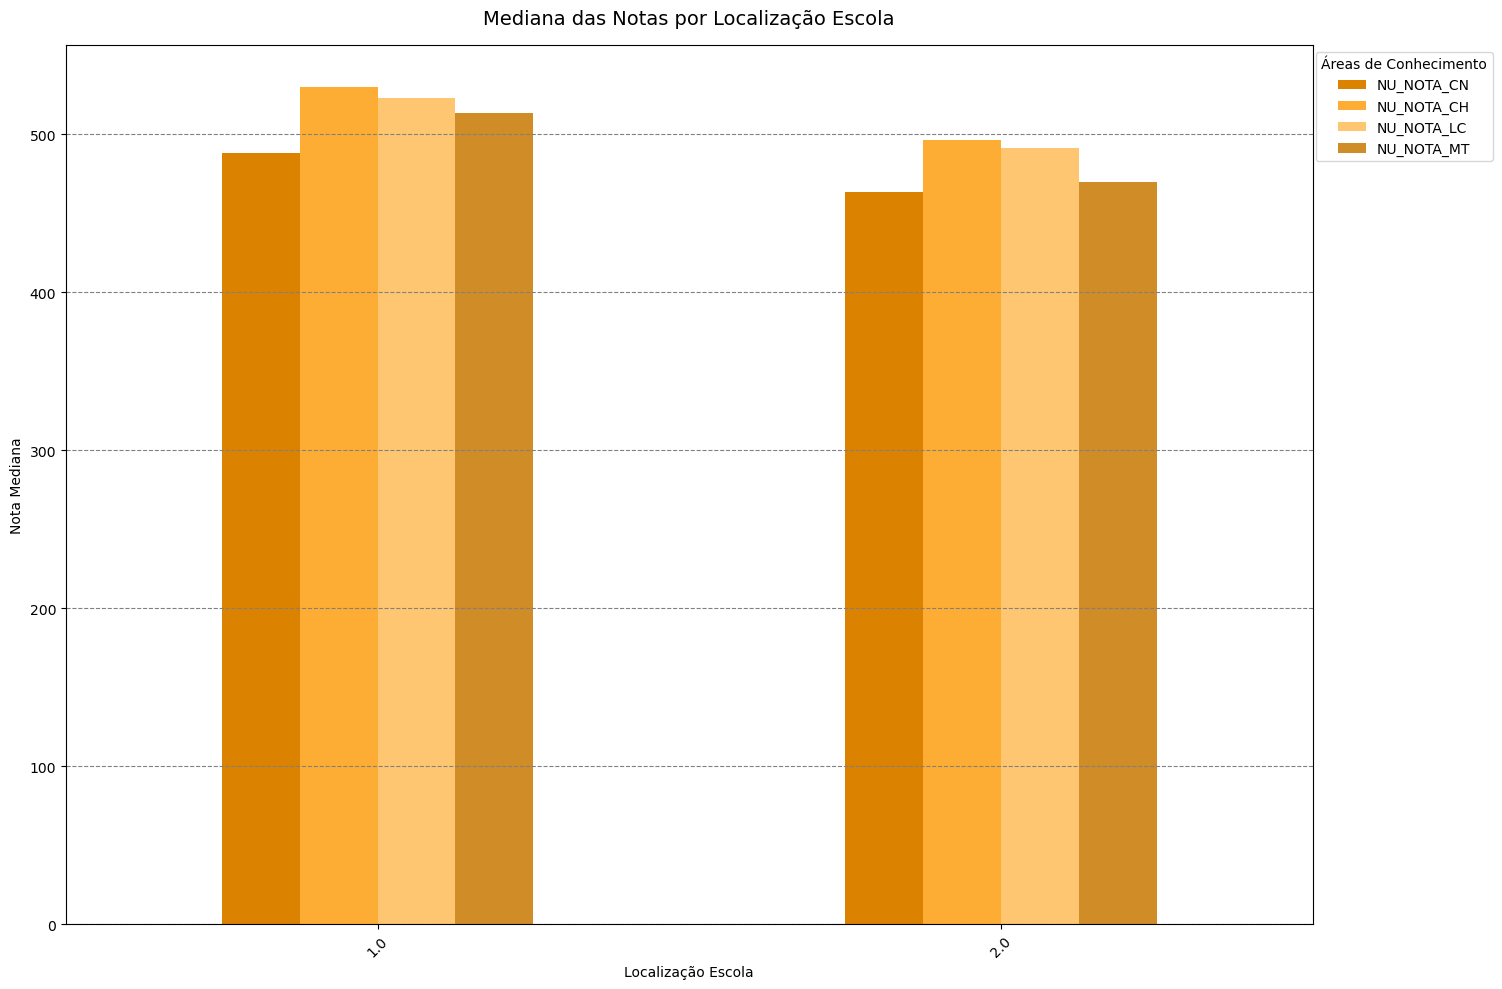

In [213]:
df.groupby('TP_LOCALIZACAO_ESC')[['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT']].median().plot(
    kind='bar', 
    color=cores, 
    figsize=(15, 10)  
)

# Ajustes de título e eixos
plt.title('Mediana das Notas por Localização Escola', fontsize=14, pad=15)
plt.ylabel('Nota Mediana')
plt.xlabel('Localização Escola')
plt.grid(True, linestyle='--', color='gray', axis='y')
plt.xticks(rotation=45)

#  Posição da legenda
plt.legend(
    title='Áreas de Conhecimento',
    loc='upper right',      
    bbox_to_anchor=(1.15, 1)  
)

plt.tight_layout()
plt.show()


localização da escola:<br>
1	Urbana<br>
2	Rural<br>

Os gráficos deixam evidente uma realidade já conhecida, mas ainda alarmante: escolas localizadas em áreas urbanas apresentam desempenho superior às das zonas rurais. Essa diferença pode ser explicada por uma série de desafios enfrentados no campo. Em muitas regiões, os alunos percorrem longas distâncias até a escola — quando há transporte disponível. Além disso, a dificuldade de acesso também afeta os professores, que muitas vezes enfrentam trajetos complicados ou até desestimulantes para lecionar em comunidades mais isoladas.

Essa combinação de obstáculos impacta diretamente a qualidade do ensino e o rendimento dos estudantes. A desigualdade entre o urbano e o rural, portanto, não é apenas geográfica — ela se reflete nas oportunidades de aprendizado e, como mostram os dados, nas notas do Enem.

Conclusão
Os dados analisados deixam evidente que, em todo o país, as escolas privadas apresentam desempenho superior em relação às públicas nas provas do Enem. Essa vantagem é consistente e aparece em todas as áreas avaliadas. No entanto, dentro da rede pública, as escolas federais se destacam como referência de qualidade, com notas que, em muitos casos, se aproximam das obtidas por instituições privadas. Isso demonstra que, com estrutura adequada, investimento contínuo e corpo docente valorizado, é possível alcançar resultados expressivos também na educação pública.

Outro fator que merece atenção é a influência da localização geográfica no desempenho dos estudantes. Em alguns estados, a diferença nas notas é acentuada, refletindo desigualdades regionais que afetam diretamente o acesso à educação de qualidade. Essa realidade é ainda mais evidente nas escolas situadas em áreas rurais, onde os desafios logísticos e estruturais dificultam o aprendizado e impactam o desempenho dos alunos no Enem — e, por consequência, suas oportunidades futuras.

### <span style="color:#DB8201;">3.5 Há disparidades de desempenho por sexo, raça/cor?</span>

Ao aprofundar a análise dos dados do Enem, surge uma questão essencial: o desempenho dos participantes varia de acordo com características como sexo, raça/cor ou idade? Investigar essas disparidades é fundamental para entender como fatores sociais e demográficos influenciam os resultados e revelam desigualdades que vão além do tipo de escola ou da região onde se estuda. A seguir, exploramos como esses grupos se comportam nas provas e o que os dados nos mostram sobre suas trajetórias. Iniciaremos analisando o Sexo.

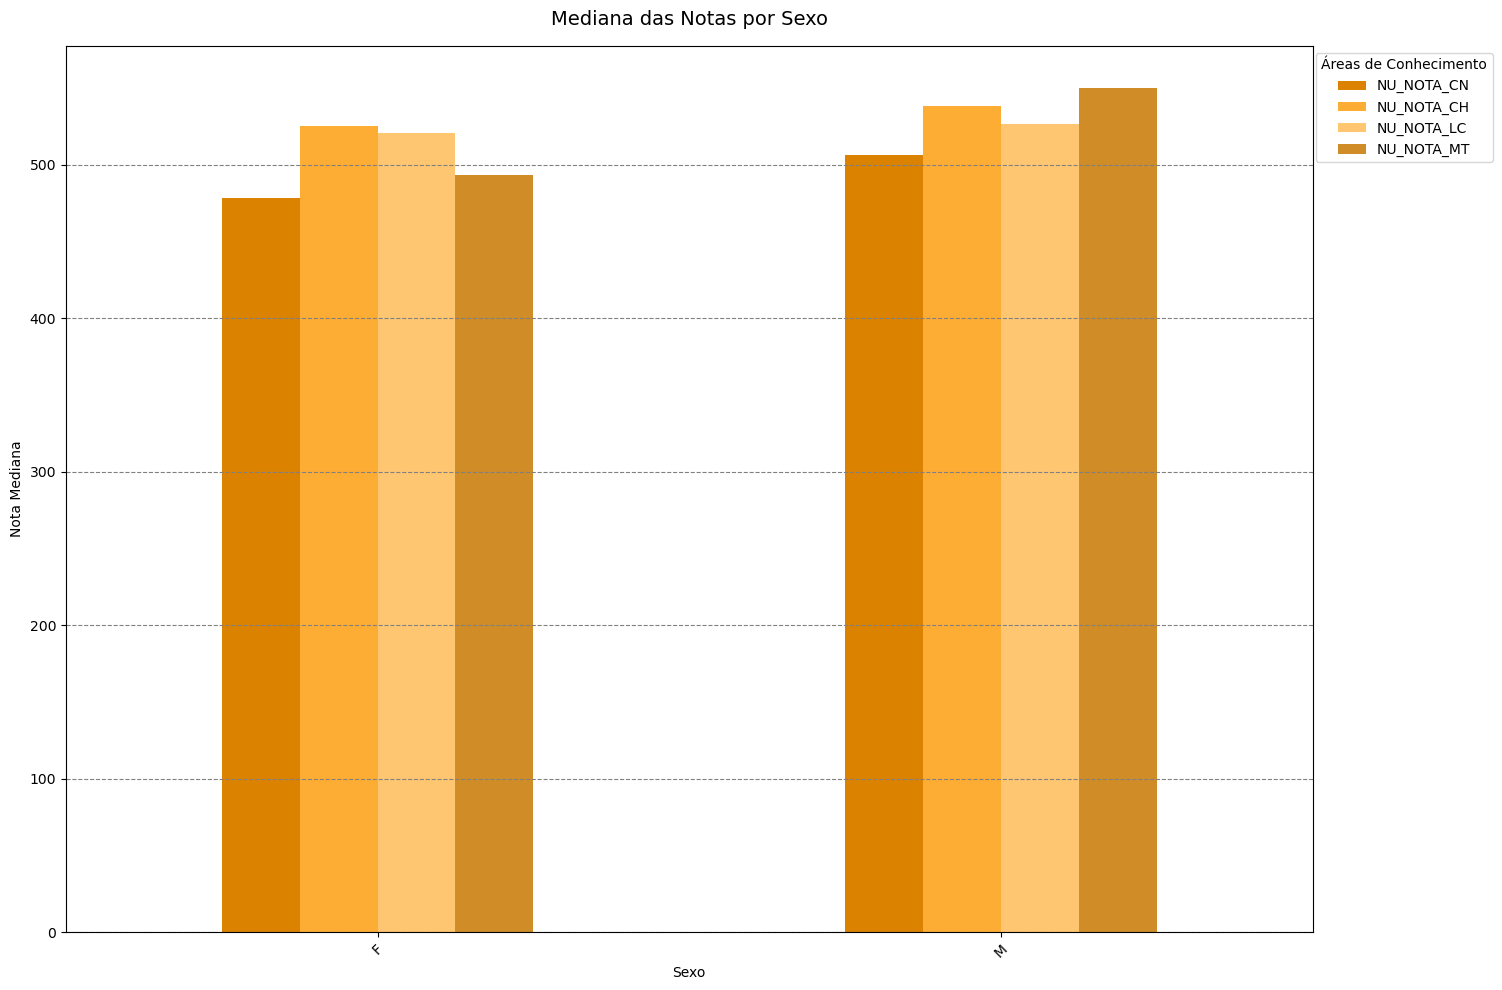

In [216]:
df.groupby('TP_SEXO')[['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT']].median().plot(
    kind='bar', 
    color=cores, 
    figsize=(15, 10)  
)

# Ajustes de título e eixos
plt.title('Mediana das Notas por Sexo', fontsize=14, pad=15)
plt.ylabel('Nota Mediana')
plt.xlabel('Sexo')
plt.grid(True, linestyle='--', color='gray', axis='y')
plt.xticks(rotation=45)

#  Posição da legenda
plt.legend(
    title='Áreas de Conhecimento',
    loc='upper right',      
    bbox_to_anchor=(1.15, 1)  
)

plt.tight_layout()
plt.show()

Quando analisamos o desempenho por sexo, um padrão interessante emerge: homens e mulheres apresentam resultados bastante semelhantes nas provas de Ciências Humanas e Linguagens e Códigos, com medianas próximas e pouca variação. No entanto, essa paridade se desfaz nas áreas de Matemática e Ciências da Natureza, onde os homens tendem a obter notas mais altas, revelando uma vantagem consistente nessas disciplinas. Essa diferença pode estar relacionada a fatores como perfil de interesse, estímulo educacional ou até mesmo à forma como essas áreas são abordadas ao longo da formação escolar.
Vamos análisar agora a cor/raça. 

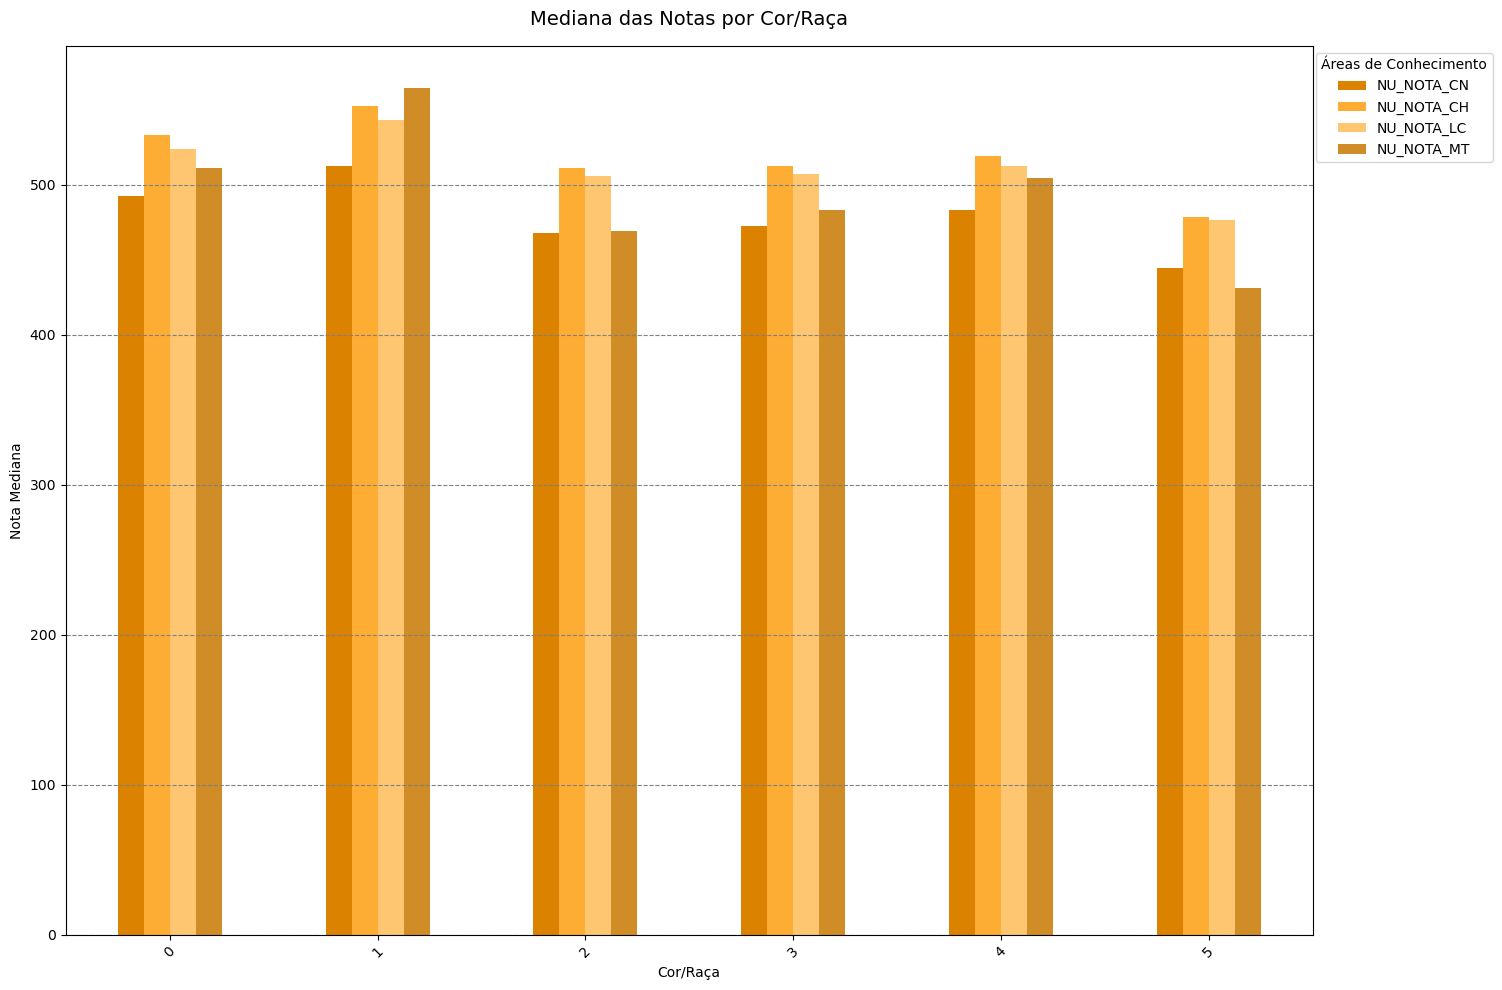

In [218]:
df.groupby('TP_COR_RACA')[['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT']].median().plot(
    kind='bar', 
    color=cores, 
    figsize=(15, 10)  
)

# Ajustes de título e eixos
plt.title('Mediana das Notas por Cor/Raça', fontsize=14, pad=15)
plt.ylabel('Nota Mediana')
plt.xlabel('Cor/Raça')
plt.grid(True, linestyle='--', color='gray', axis='y')
plt.xticks(rotation=45)

#  Posição da legenda
plt.legend(
    title='Áreas de Conhecimento',
    loc='upper right',      
    bbox_to_anchor=(1.15, 1)  
)

plt.tight_layout()
plt.show()

Definição dos dados:<br>
0	Não declarado<br>
1	Branca<br>
2	Preta<br>
3	Parda<br>
4	Amarela<br>
5	Indígena <br>
6	Não dispõe da informação<br>

Ao analisar os dados do Enem, é possível perceber diferenças no desempenho entre os grupos de raça/cor. Os participantes que se autodeclaram brancos apresentam, em média, notas mais altas em comparação aos demais grupos. Já os estudantes pardos e pretos têm desempenhos semelhantes entre si. Um ponto que merece atenção é o desempenho dos participantes indígenas, que aparece como o mais baixo entre os grupos analisados.

Essas diferenças não devem ser interpretadas como reflexo de capacidade individual, mas sim como indicadores das desigualdades sociais e educacionais que ainda existem no país. Fatores como acesso à infraestrutura escolar, oportunidades de reforço, apoio familiar e localização geográfica influenciam diretamente o desempenho dos estudantes — e ajudam a explicar por que certos grupos enfrentam mais obstáculos ao longo da trajetória educacional.
Por último vamos analisar a questão da idade. 

## <span id="conclusao" style="color:#DB8201;">4. Conclusão</span>

A análise dos dados do Enem revela com clareza que a renda familiar é um dos principais fatores que influenciam o acesso à educação de qualidade. Famílias com maior poder aquisitivo conseguem matricular seus filhos em escolas com melhor infraestrutura, professores mais qualificados e maior oferta de recursos pedagógicos. Por outro lado, famílias em situação de vulnerabilidade enfrentam desafios que vão muito além da sala de aula — como distância até a escola, falta de apoio educacional em casa e dificuldades econômicas que impactam diretamente o desempenho dos estudantes.

Além da renda, a região onde o aluno vive também exerce influência significativa. Diferenças acentuadas entre estados e entre áreas urbanas e rurais mostram que o acesso à educação ainda é desigual no Brasil. No entanto, há exceções que merecem destaque: as escolas públicas federais se sobressaem com notas elevadas, provando que, com investimento adequado e gestão eficiente, é possível oferecer ensino de qualidade dentro da rede pública.

E talvez o ponto mais inspirador da análise esteja nos outliers — aqueles estudantes de baixa renda que, mesmo enfrentando inúmeros obstáculos, conseguem tirar notas acima da média. Esses casos mostram que a educação continua sendo uma poderosa ferramenta de transformação, capaz de abrir portas, mudar trajetórias e oferecer novas perspectivas para o futuro.

Mais do que uma prova, o Enem funciona como um verdadeiro termômetro da educação brasileira. Ele revela não apenas o nível de conhecimento dos estudantes, mas também os efeitos profundos que a situação econômica exerce sobre suas oportunidades. Afinal, o acesso à faculdade e a chance de conquistar um trabalho que transforme a realidade de uma família muitas vezes começa com uma única nota — e com a esperança de que, apesar das dificuldades, é possível ir além.